In [168]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [169]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [170]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [171]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<h1>EDA</h1>

<h3>Univariate Analysis</h3>

C:\Users\Ichvan\AppData\Local\Temp\ipykernel_17664\421323220.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]])
C:\Users\Ichvan\AppData\Local\Temp\ipykernel_17664\421323220.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]])
C:\Users\Ichvan\AppData\Local\Temp\ipykernel_17664

C:\Users\Ichvan\AppData\Local\Temp\ipykernel_17664\421323220.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i[1]])


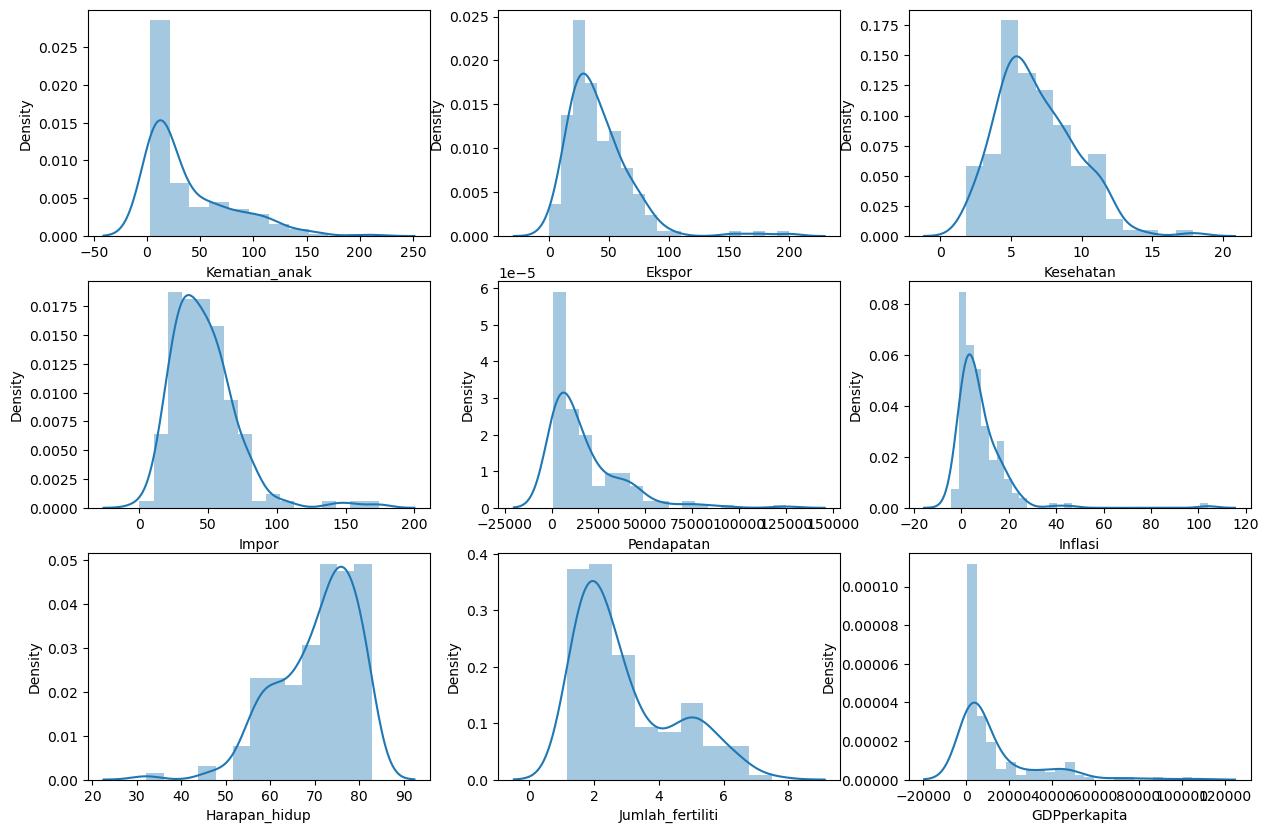

In [172]:
plt.figure(figsize=(15,10))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

<h1>Bivariate Analysis</h1>

<h5>Pendapatan & GDPperkapita Terbesar</h5>

In [173]:
pendapatan_negara = df.sort_values('Pendapatan', ascending=False)
pendapatan_negara

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
123,Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,175.00,7.77,142.0,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,67.40,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.70,2.63,30.4,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,200.00,3.96,174.0,72100,-0.046,82.7,1.15,46600
...,...,...,...,...,...,...,...,...,...,...
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327


<h2>Pendapatan - GDPpendapatan Plot by Bar</h2>

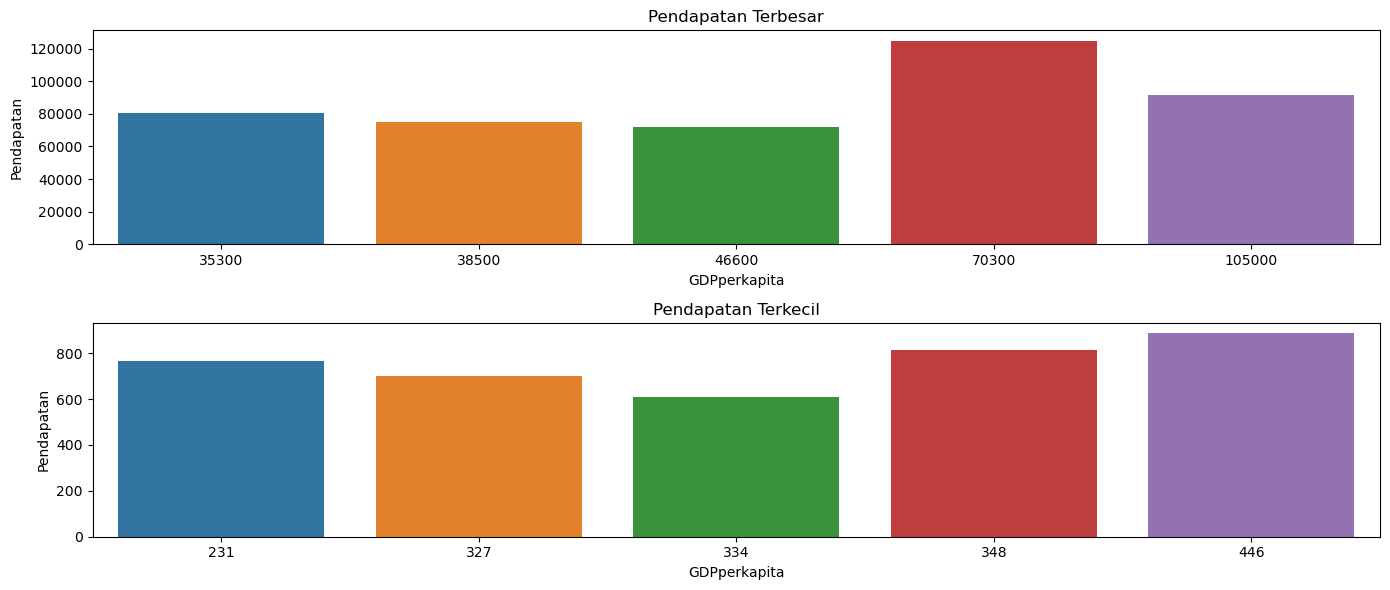

In [174]:
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
sns.barplot(x=pendapatan_negara.GDPperkapita.head(), y=pendapatan_negara.Pendapatan.head())
plt.title('Pendapatan Terbesar')
plt.subplot(2, 1, 2)
sns.barplot(x=pendapatan_negara.GDPperkapita.tail(), y=pendapatan_negara.Pendapatan.tail())
plt.title('Pendapatan Terkecil')
plt.tight_layout()
plt.show()

<h2>Kematian Anak - Jumlah Fertiliti</h2>

In [175]:
kematian_anak = df.sort_values('Kematian_anak', ascending=False)
kematian_anak

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000


<h2>Kematian Anak - Harapan Hidup Plot by Bar </h2>

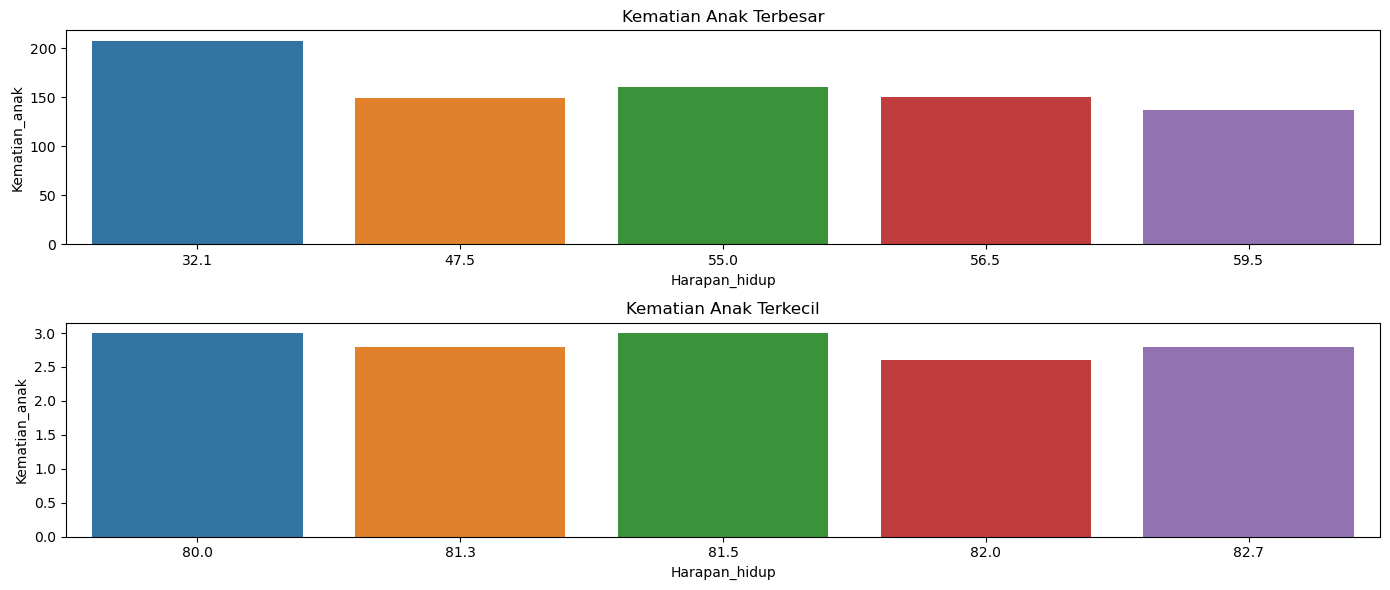

In [176]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(x=kematian_anak.Harapan_hidup.head(), y=kematian_anak.Kematian_anak.head())
plt.title('Kematian Anak Terbesar')
plt.subplot(2,1,2)
sns.barplot(x=kematian_anak.Harapan_hidup.tail(), y=kematian_anak.Kematian_anak.tail())
plt.title('Kematian Anak Terkecil')
plt.tight_layout()
plt.show()

<h2>Ekspor - Impor</h2>

In [177]:
expimp = df.sort_values('Ekspor', ascending=False)
expimp

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
133,Singapore,2.8,200.000,3.96,174.0000,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.000,7.77,142.0000,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.000,8.65,154.0000,28300,3.830,80.3,1.36,21100
73,Ireland,4.2,103.000,9.19,86.5000,45700,-3.220,80.4,2.05,48700
131,Seychelles,14.4,93.800,3.40,108.0000,20400,-4.210,73.4,2.17,10800
...,...,...,...,...,...,...,...,...,...,...
109,Nepal,47.0,9.580,5.25,36.4000,1990,15.100,68.3,2.61,592
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231
50,Eritrea,55.2,4.790,2.66,23.3000,1420,11.600,61.7,4.61,482
149,Timor-Leste,62.6,2.200,9.12,27.8000,1850,26.500,71.1,6.23,3600


<h2>Plot by Bar</h2>

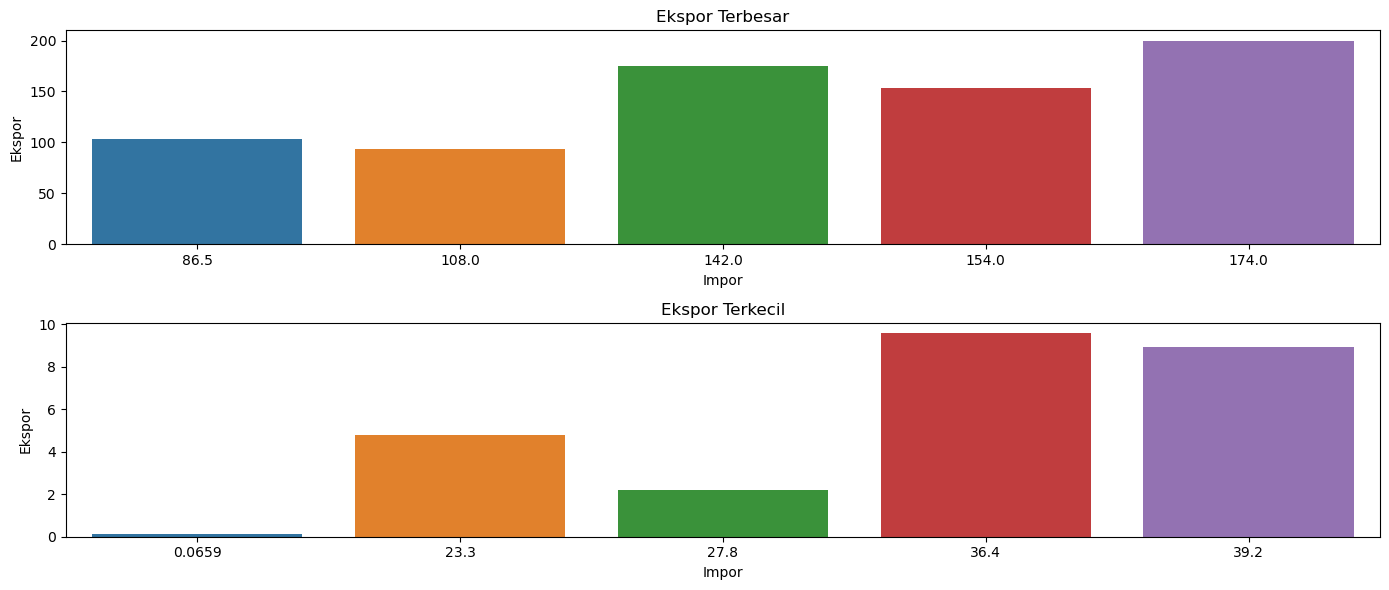

In [178]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(x=expimp.Impor.head(), y=expimp.Ekspor.head())
plt.title('Ekspor Terbesar')
plt.subplot(2,1,2)
sns.barplot(x=expimp.Impor.tail(), y=expimp.Ekspor.tail())
plt.title('Ekspor Terkecil')
plt.tight_layout()
plt.show()
     

<h2>Pendapatan - Harapan Hidup</h2>

In [179]:
pendapatan = df.sort_values('Pendapatan', ascending=False)
pendapatan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
123,Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,175.00,7.77,142.0,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,67.40,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.70,2.63,30.4,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,200.00,3.96,174.0,72100,-0.046,82.7,1.15,46600
...,...,...,...,...,...,...,...,...,...,...
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327


<h2>Pendapatan Negara Paling Kecil</h2>

In [180]:
min(df['Pendapatan'])

609

<h2> Plot by Bar</h2>

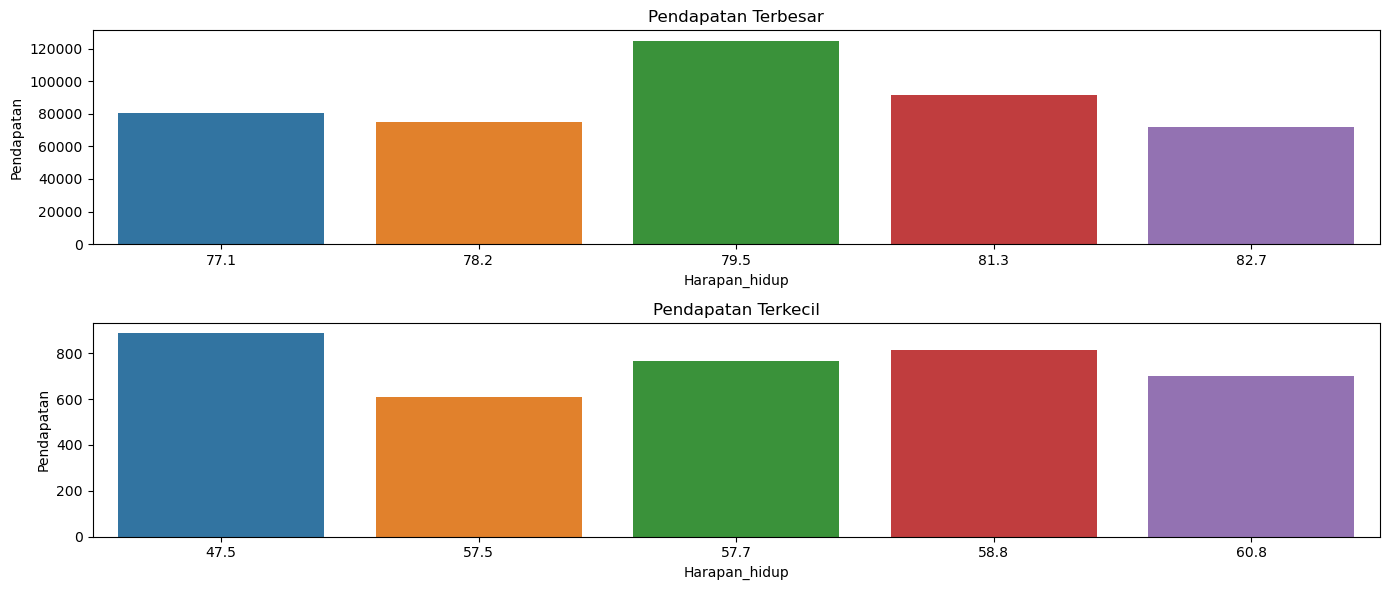

In [181]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(x=pendapatan.Harapan_hidup.head(), y=pendapatan.Pendapatan.head())
plt.title('Pendapatan Terbesar')
plt.subplot(2,1,2)
sns.barplot(x=pendapatan.Harapan_hidup.tail(), y=pendapatan.Pendapatan.tail())
plt.title('Pendapatan Terkecil')
plt.tight_layout()
plt.show()

<h2>Terkecil </h2>
<h2>Harapan Hidup - Kematian </h2>

In [182]:
death = df.sort_values('Kematian_anak', ascending=False)
death

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000


<h2>Plot by Bar </h2>

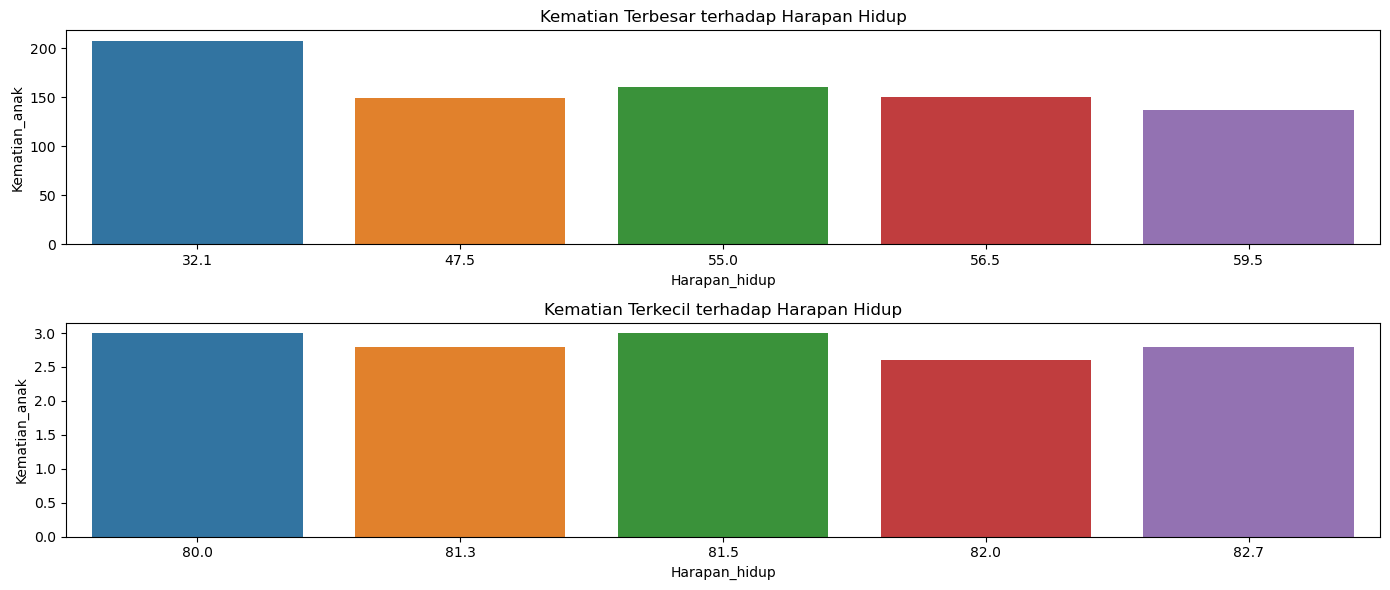

In [183]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(x=death.Harapan_hidup.head(), y=death.Kematian_anak.head())
plt.title('Kematian Terbesar terhadap Harapan Hidup')
plt.subplot(2,1,2)
sns.barplot(x=death.Harapan_hidup.tail(), y=death.Kematian_anak.tail())
plt.title('Kematian Terkecil terhadap Harapan Hidup')
plt.tight_layout()
plt.show()

Harapan_hidup - Jumlah_fertiliti

In [184]:
Harapan_hidup1 = df.sort_values('Kematian_anak', ascending=False)
Harapan_hidup1

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000


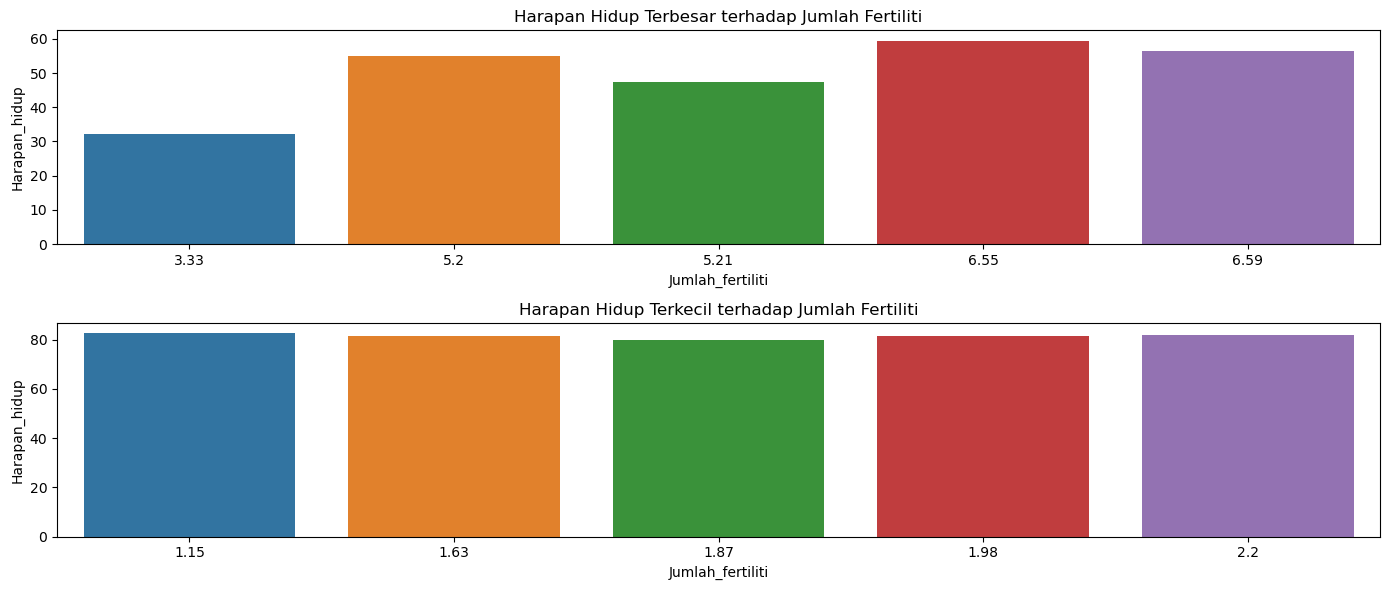

In [185]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
sns.barplot(x=Harapan_hidup1.Jumlah_fertiliti.head(), y=Harapan_hidup1.Harapan_hidup.head())
plt.title('Harapan Hidup Terbesar terhadap Jumlah Fertiliti')
plt.subplot(2,1,2)
sns.barplot(x=Harapan_hidup1.Jumlah_fertiliti.tail(), y=Harapan_hidup1.Harapan_hidup.tail())
plt.title('Harapan Hidup Terkecil terhadap Jumlah Fertiliti')
plt.tight_layout()
plt.show()

<h1>Multivariate</h1>

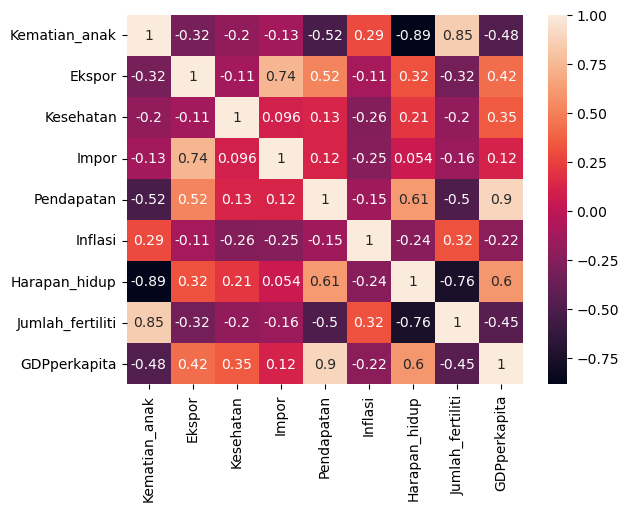

In [186]:
# Create a subset of the DataFrame with only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Create the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Create the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2g');

<h2>Outlier Detection</h2>

<Axes: xlabel='GDPperkapita'>

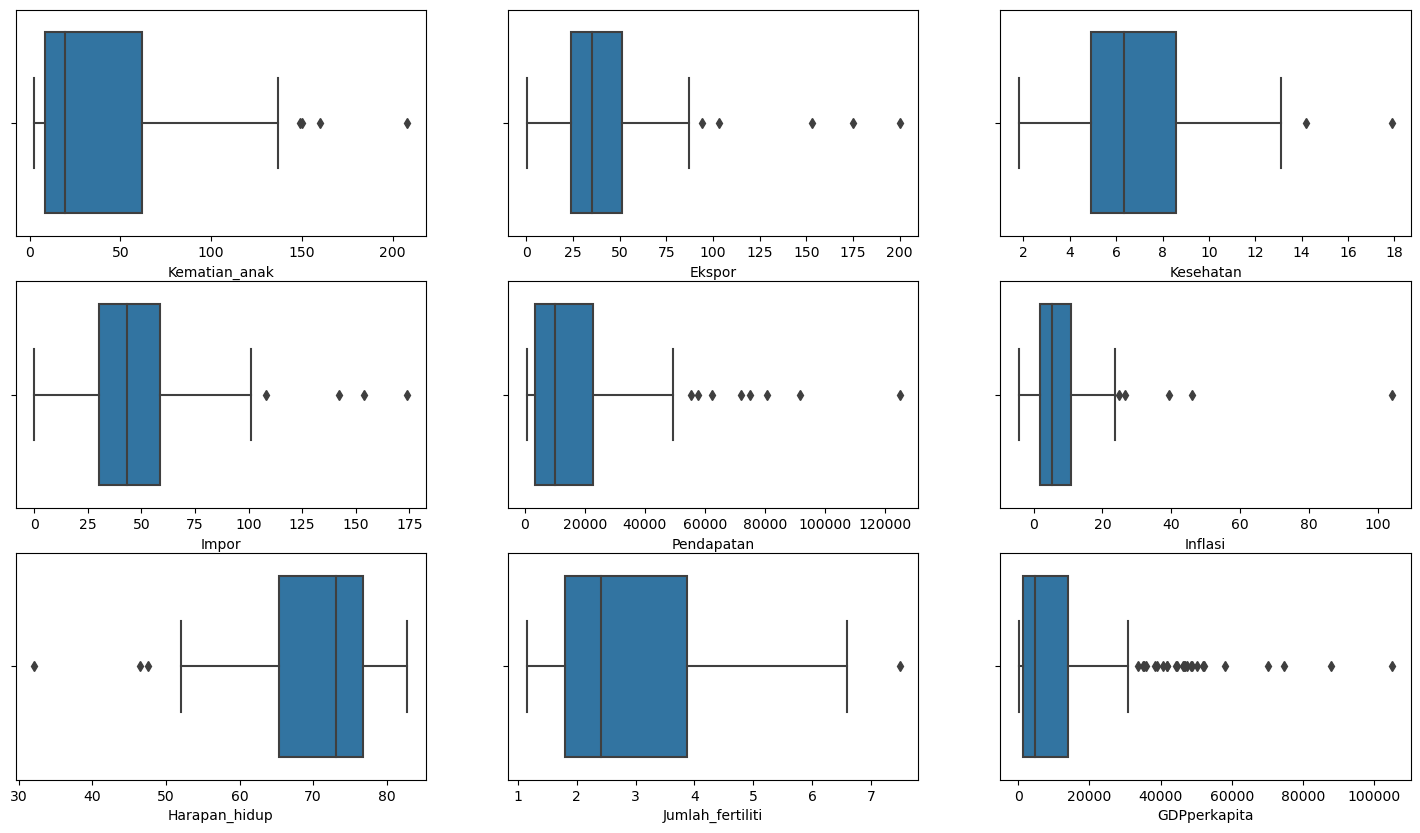

In [187]:
fig, ax = plt.subplots(3,3,figsize=(18, 10))
sns.boxplot(ax=ax[0, 0], data=df, x='Kematian_anak')
sns.boxplot(ax=ax[0, 1], data=df, x='Ekspor')
sns.boxplot(ax=ax[0, 2], data=df, x='Kesehatan')

sns.boxplot(ax=ax[1, 0], data=df, x='Impor')
sns.boxplot(ax=ax[1, 1], data=df, x='Pendapatan')
sns.boxplot(ax=ax[1, 2], data=df, x='Inflasi')

sns.boxplot(ax=ax[2, 0], data=df, x='Harapan_hidup')
sns.boxplot(ax=ax[2, 1], data=df, x='Jumlah_fertiliti')
sns.boxplot(ax=ax[2, 2], data=df, x='GDPperkapita')

In [188]:
def finding_outlier(df):
      Q1 = df.quantile(0.25)
      Q3 = df.quantile(0.75)
      IQR  = Q3-Q1
      df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
      return df_final

In [189]:
print(finding_outlier(df['Kematian_anak']))
print(finding_outlier(df['Ekspor']))
print(finding_outlier(df['Kesehatan']))
print(finding_outlier(df['Impor']))
print(finding_outlier(df['Pendapatan']))
print(finding_outlier(df['Inflasi']))
print(finding_outlier(df['Harapan_hidup']))
print(finding_outlier(df['Jumlah_fertiliti']))
print(finding_outlier(df['GDPperkapita']))

31     149.0
32     150.0
66     208.0
132    160.0
Name: Kematian_anak, dtype: float64
73     103.0
91     175.0
98     153.0
131     93.8
133    200.0
Name: Ekspor, dtype: float64
101    14.2
159    17.9
Name: Kesehatan, dtype: float64
91     142.0
98     154.0
131    108.0
133    174.0
Name: Impor, dtype: float64
23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: Pendapatan, dtype: int64
49      24.9
103     39.2
113    104.0
149     26.5
163     45.9
Name: Inflasi, dtype: float64
31    47.5
66    32.1
87    46.5
Name: Harapan_hidup, dtype: float64
112    7.49
Name: Jumlah_fertiliti, dtype: float64
7       51900
8       46900
15      44400
23      35300
29      47400
44      58000
53      46200
54      40600
58      41800
68      41900
73      48700
75      35800
77      44500
82      38500
91     105000
110     50300
111     33700
114     87800
123     70300
133     46600
144     52100
145     74600
157     35000
15

Remove Outlier

In [190]:
def remove_outlier(df):
      Q1 = df.quantile(0.25)
      Q3 = df.quantile(0.75)
      IQR  = Q3-Q1
      df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
      return df_final

In [191]:
df3 = remove_outlier(df[['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']])
df3.dropna(axis=0, inplace=True)
df3


,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
161,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0
162,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
164,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


<Axes: xlabel='GDPperkapita'>

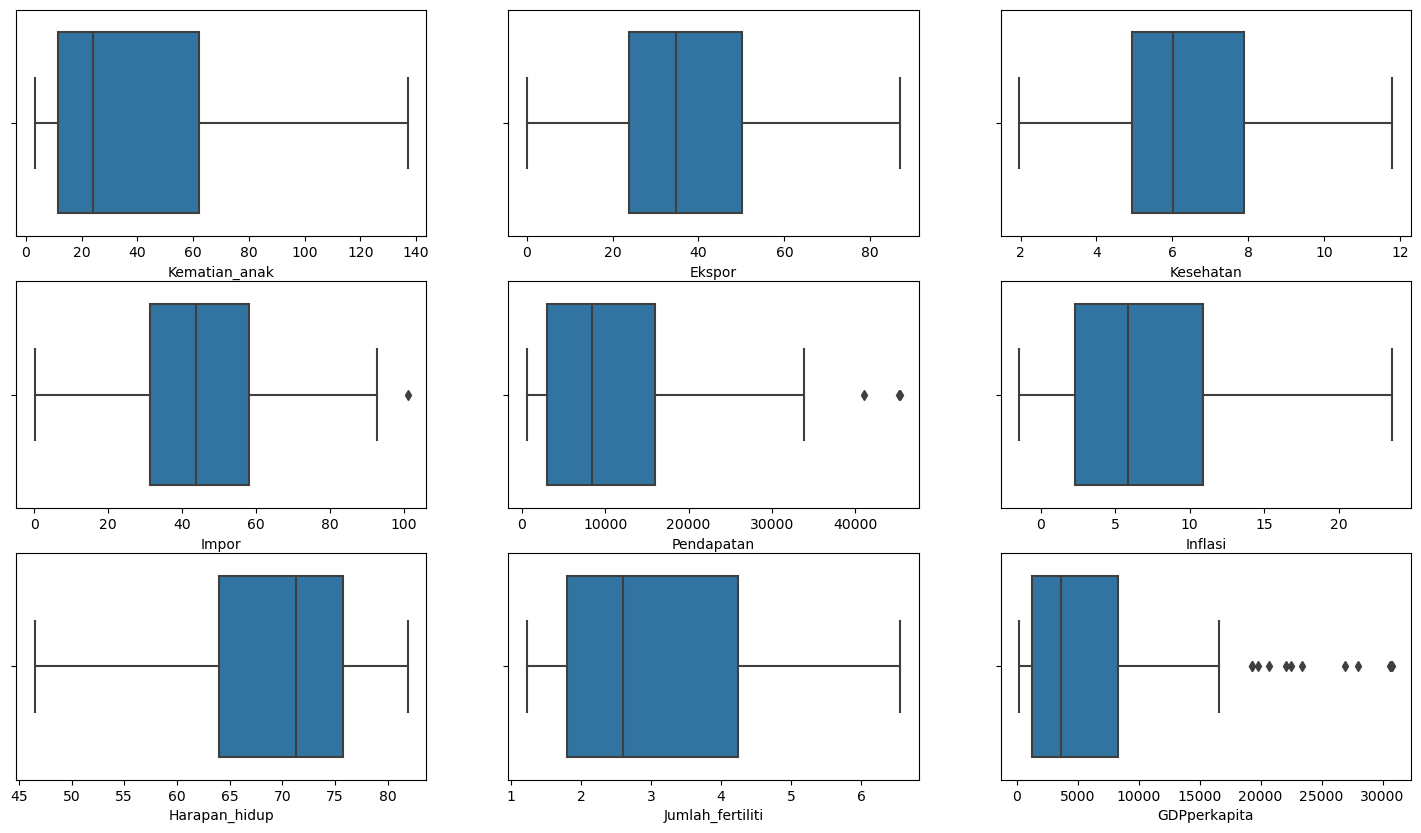

In [192]:
fig2, ax2 = plt.subplots(3,3,figsize=(18, 10))
sns.boxplot(ax=ax2[0, 0], data=df3, x='Kematian_anak')
sns.boxplot(ax=ax2[0, 1], data=df3, x='Ekspor')
sns.boxplot(ax=ax2[0, 2], data=df3, x='Kesehatan')

sns.boxplot(ax=ax2[1, 0], data=df3, x='Impor')
sns.boxplot(ax=ax2[1, 1], data=df3, x='Pendapatan')
sns.boxplot(ax=ax2[1, 2], data=df3, x='Inflasi')

sns.boxplot(ax=ax2[2, 0], data=df3, x='Harapan_hidup')
sns.boxplot(ax=ax2[2, 1], data=df3, x='Jumlah_fertiliti')
sns.boxplot(ax=ax2[2, 2], data=df3, x='GDPperkapita')

<h1>Scaling Data</h1>

<h3>KMeans 1 </h3>

In [193]:
sc = StandardScaler()
df_std = sc.fit_transform(df3)

In [194]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1
     

c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [195]:
new_df = pd.DataFrame(data=df_std, columns=['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])
new_df['label1_kmeans'] = labels1
new_df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans
0,1.492609,-1.471494,0.536055,-0.036074,-0.973550,0.348142,-1.745686,1.922744,-0.821294,1
1,-0.664447,-0.506321,0.075227,0.166098,-0.118393,-0.462824,0.889613,-0.943787,-0.323232,0
2,-0.350853,0.051335,-0.989600,-0.773730,0.186874,1.439258,0.915835,-0.091389,-0.271131,0
3,2.336675,1.332871,-1.580176,-0.145357,-0.532610,2.471396,-1.234360,2.156465,-0.402089,1
4,-0.849086,0.432042,-0.157425,0.728903,0.824131,-0.962509,0.955168,-0.613826,0.818776,0
...,...,...,...,...,...,...,...,...,...,...
124,-0.087083,-0.307924,-0.255854,-0.932190,-0.703230,1.504791,-0.093708,-0.469469,-0.704841,1
125,-0.295168,0.491025,-0.506401,0.390127,-0.835821,-0.769188,-0.854142,0.327935,-0.480945,1
126,-0.468085,1.852992,0.204974,1.892760,-0.677534,0.783933,0.470063,-0.737561,-0.714698,0
127,0.499074,-0.399079,-0.537720,-0.609807,-0.678562,2.667993,-0.264150,1.132214,-0.714698,1


In [196]:
print(max(new_df['label1_kmeans']))


1


<h3>Ekspor - Impor</h3>

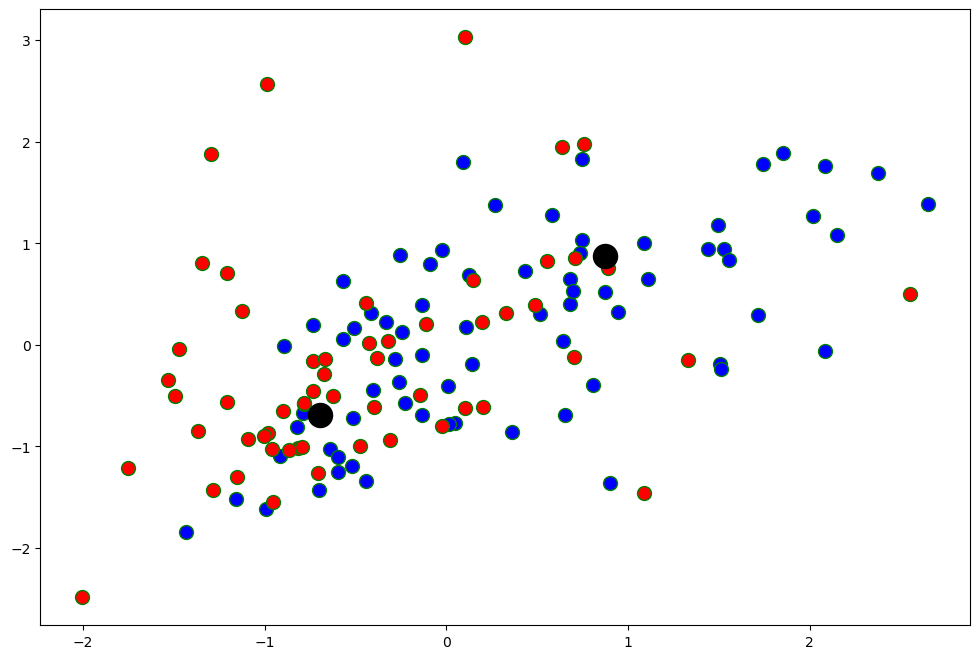

In [197]:
plt.figure(figsize=(12,8))
plt.scatter(new_df['Ekspor'][new_df.label1_kmeans==0], new_df['Impor'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Ekspor'][new_df.label1_kmeans==1], new_df['Impor'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

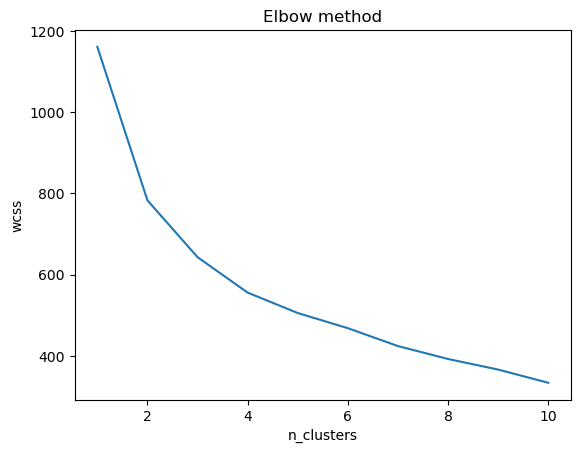

In [198]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=189)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

<h3>KMeans 2 </h3>

In [199]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_

c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [200]:
new_df['label2_kmeans'] = labels2
new_df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,1.492609,-1.471494,0.536055,-0.036074,-0.973550,0.348142,-1.745686,1.922744,-0.821294,1,2
1,-0.664447,-0.506321,0.075227,0.166098,-0.118393,-0.462824,0.889613,-0.943787,-0.323232,0,3
2,-0.350853,0.051335,-0.989600,-0.773730,0.186874,1.439258,0.915835,-0.091389,-0.271131,0,1
3,2.336675,1.332871,-1.580176,-0.145357,-0.532610,2.471396,-1.234360,2.156465,-0.402089,1,2
4,-0.849086,0.432042,-0.157425,0.728903,0.824131,-0.962509,0.955168,-0.613826,0.818776,0,0
...,...,...,...,...,...,...,...,...,...,...,...
124,-0.087083,-0.307924,-0.255854,-0.932190,-0.703230,1.504791,-0.093708,-0.469469,-0.704841,1,1
125,-0.295168,0.491025,-0.506401,0.390127,-0.835821,-0.769188,-0.854142,0.327935,-0.480945,1,3
126,-0.468085,1.852992,0.204974,1.892760,-0.677534,0.783933,0.470063,-0.737561,-0.714698,0,3
127,0.499074,-0.399079,-0.537720,-0.609807,-0.678562,2.667993,-0.264150,1.132214,-0.714698,1,2


In [201]:
print(max(new_df['label2_kmeans']))


3


In [202]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.2767052547285692
0.21468205592932044


<h3>Ekspor-Impor </h3>

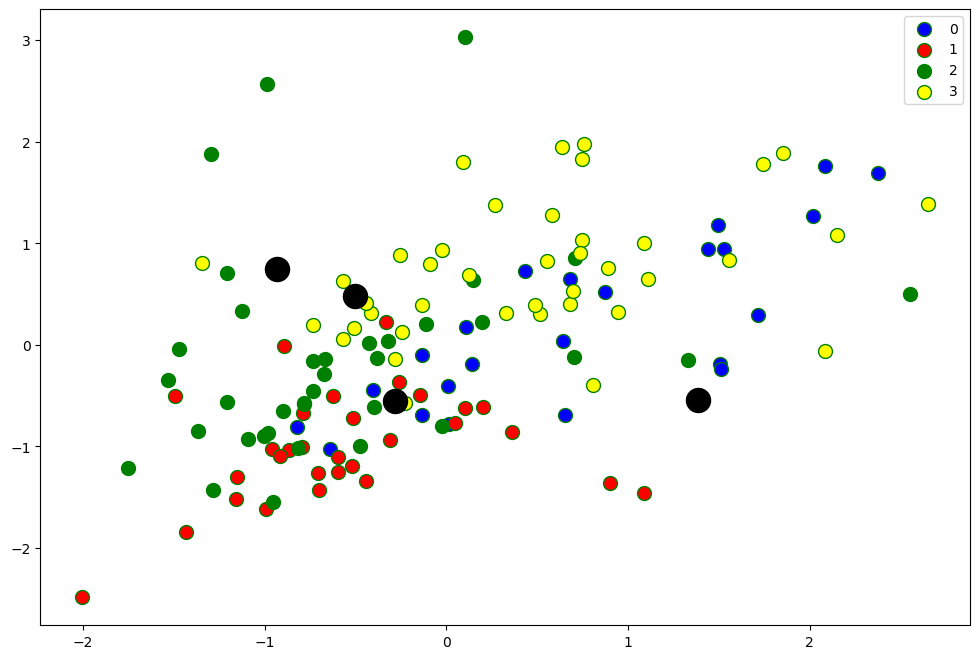

In [203]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Ekspor'][new_df.label2_kmeans==0], new_df['Impor'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Ekspor'][new_df.label2_kmeans==1], new_df['Impor'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Ekspor'][new_df.label2_kmeans==2], new_df['Impor'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['Ekspor'][new_df.label2_kmeans==3], new_df['Impor'][new_df.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.show()

<h3>Inverse Transform </h3>

In [204]:
from sklearn.cluster import KMeans
kmeansa = KMeans(n_clusters = 2, random_state=42)
kmeansa.fit(sc.inverse_transform(df_std))
labelsa = kmeansa.labels_
labelsa

c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [205]:
kmeansb = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeansb = kmeansb.fit(df_std)
labelsb = kmeansb.labels_
labelsb

c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 3, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 3, 3, 2, 3, 1, 3, 3, 1, 3, 2,
       2, 3, 2, 3, 0, 1, 1, 2, 2, 2, 3, 2, 0, 0, 0, 1, 1, 1, 3, 2, 0, 3,
       1, 2, 3, 2, 0, 3, 1, 2, 2, 3, 0, 1, 1, 1, 1, 0, 1, 3, 1, 2, 2, 3,
       2, 0, 3, 2, 2, 0, 0, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 1, 3, 1,
       0, 2, 3, 3, 1, 1, 0, 0, 1, 1, 2, 3, 0, 2, 3, 0, 0, 3, 2, 0, 0, 1,
       3, 2, 3, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 1, 1, 3, 3, 2, 2])

In [206]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])
new_df1['label1_kmeans'] = labelsa
new_df1['label2_kmeans'] = labelsb
new_df1

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1,2
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1,3
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1,1
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1,2
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
124,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0,1,1
125,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,1,3
126,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,1,3
127,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,1,2


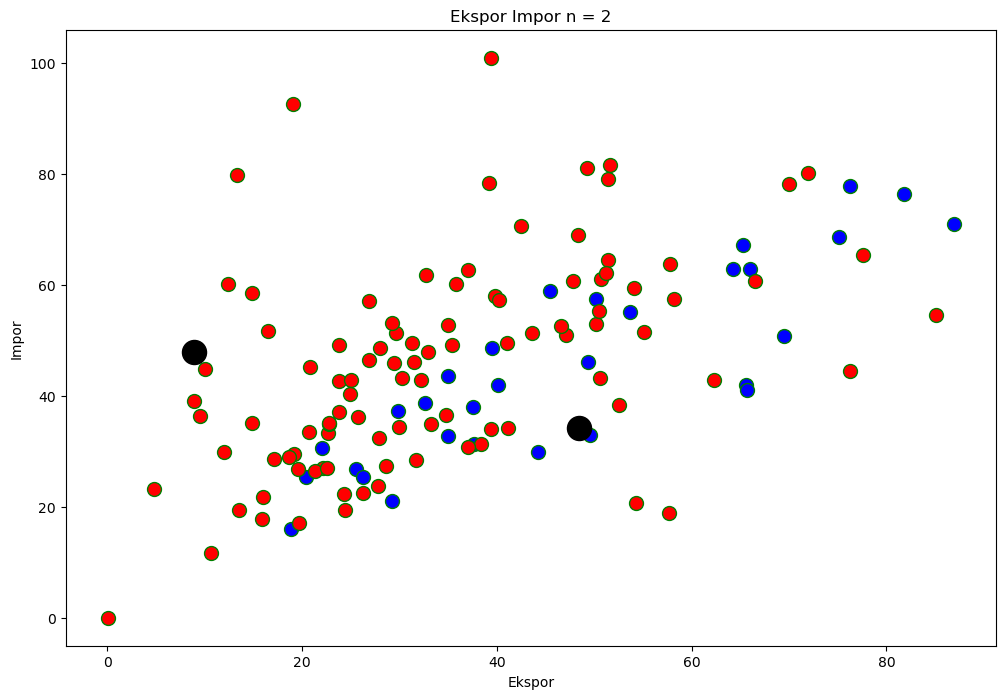

In [207]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Ekspor'][new_df1.label1_kmeans == 0], new_df1['Impor'][new_df1.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['Ekspor'][new_df1.label1_kmeans == 1], new_df1['Impor'][new_df1.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Ekspor Impor n = 2')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
plt.show()

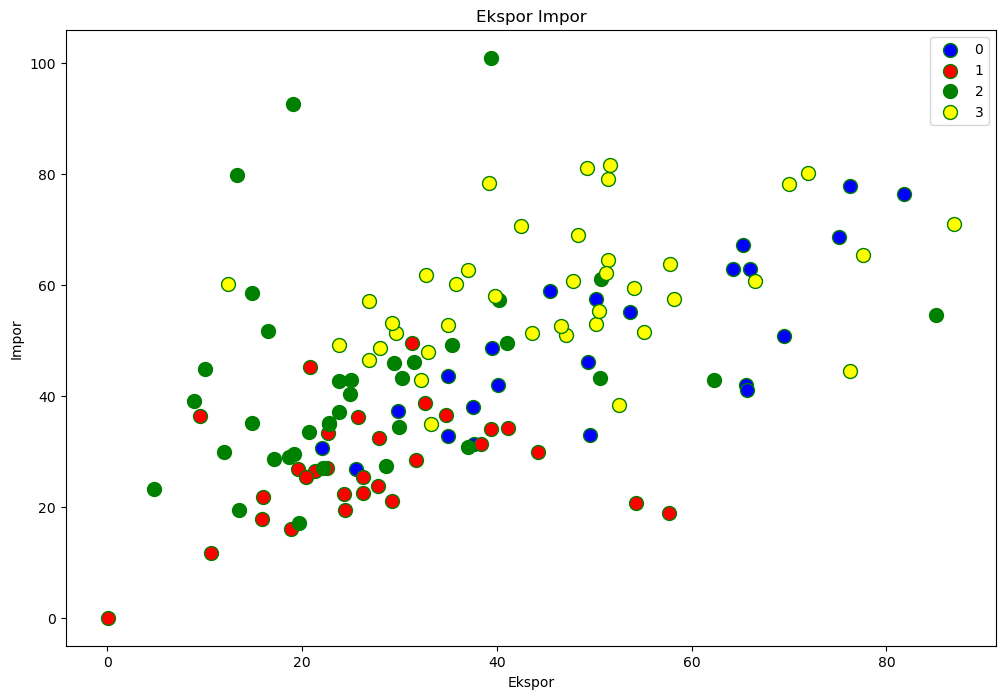

In [208]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Ekspor'][new_df1.label2_kmeans == 0], new_df1['Impor'][new_df1.label2_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(new_df1['Ekspor'][new_df1.label2_kmeans == 1], new_df1['Impor'][new_df1.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(new_df1['Ekspor'][new_df1.label2_kmeans == 2], new_df1['Impor'][new_df1.label2_kmeans == 2], c='green',label = '2', s=100, edgecolor='green')
plt.scatter(new_df1['Ekspor'][new_df1.label2_kmeans == 3], new_df1['Impor'][new_df1.label2_kmeans == 3], c='yellow', label = '3', s=100, edgecolor='green')

#plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.title('Ekspor Impor')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
plt.show()

<h3>Summary K2Means Join Outer </h3>

In [209]:
#summary to main data
df4 = pd.merge(df,new_df1, how='outer')

df4['label2_kmeans'] = df4['label2_kmeans'].astype('object')
df4

C:\Users\Ichvan\AppData\Local\Temp\ipykernel_17664\3847545849.py:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df4 = pd.merge(df,new_df1, how='outer')


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1.0,2.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1.0,3.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1.0,1.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,NaN,NaN
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
226,NaN,14.9,66.5,3.88,60.8,13500.0,4.08,76.6,1.55,5080.0,1.0,3.0
227,NaN,90.3,40.2,7.65,57.3,1210.0,1.18,58.7,4.87,488.0,1.0,2.0
228,NaN,17.4,12.4,5.07,60.3,4980.0,3.68,69.9,3.91,3550.0,1.0,3.0
229,NaN,62.0,76.3,2.50,44.5,9940.0,2.31,67.9,2.83,4440.0,1.0,3.0


<h3>Pendapatan - GDPperkapita</h3>

In [210]:
# Pendapatan
top_Pendapatan = df4[df4['label2_kmeans']==0]
top_Pendapatan.sort_values(by=['Pendapatan'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
171,NaN,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,0.0,0.0
200,NaN,7.8,53.7,6.68,55.1,18300.0,-0.812,73.1,1.36,11300.0,0.0,0.0
168,NaN,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,0.0,0.0
33,Chile,8.7,37.7,7.96,31.3,19400.0,8.960,79.1,1.88,12900.0,0.0,0.0
182,NaN,5.5,37.6,7.76,38.1,20100.0,0.821,76.3,1.55,13500.0,0.0,0.0
202,NaN,6.1,65.3,7.04,67.2,21100.0,2.380,73.2,1.50,12000.0,0.0,0.0
213,NaN,6.0,40.1,7.46,42.1,21800.0,1.660,76.3,1.41,12600.0,0.0,0.0
193,NaN,6.0,81.8,7.33,76.5,22300.0,2.330,74.5,1.25,13100.0,0.0,0.0
188,NaN,4.5,75.1,6.03,68.7,22700.0,1.740,76.0,1.72,14600.0,0.0,0.0
169,NaN,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0.0,0.0


In [211]:
df[(df['Pendapatan'] == 1990)]


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
109,Nepal,47.0,9.58,5.25,36.4,1990,15.1,68.3,2.61,592


In [212]:
# GDPperkapita
top_Pendapatan = df4[df4['label2_kmeans']==0]
top_Pendapatan.sort_values(by=['GDPperkapita'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
200,NaN,7.8,53.7,6.68,55.1,18300.0,-0.812,73.1,1.36,11300.0,0.0,0.0
202,NaN,6.1,65.3,7.04,67.2,21100.0,2.380,73.2,1.50,12000.0,0.0,0.0
89,Libya,16.6,65.6,3.88,42.1,29600.0,14.200,76.1,2.41,12100.0,0.0,0.0
168,NaN,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,0.0,0.0
213,NaN,6.0,40.1,7.46,42.1,21800.0,1.660,76.3,1.41,12600.0,0.0,0.0
33,Chile,8.7,37.7,7.96,31.3,19400.0,8.960,79.1,1.88,12900.0,0.0,0.0
193,NaN,6.0,81.8,7.33,76.5,22300.0,2.330,74.5,1.25,13100.0,0.0,0.0
182,NaN,5.5,37.6,7.76,38.1,20100.0,0.821,76.3,1.55,13500.0,0.0,0.0
188,NaN,4.5,75.1,6.03,68.7,22700.0,1.740,76.0,1.72,14600.0,0.0,0.0
171,NaN,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,0.0,0.0


In [213]:
df[(df['GDPperkapita'] == 988)]


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988


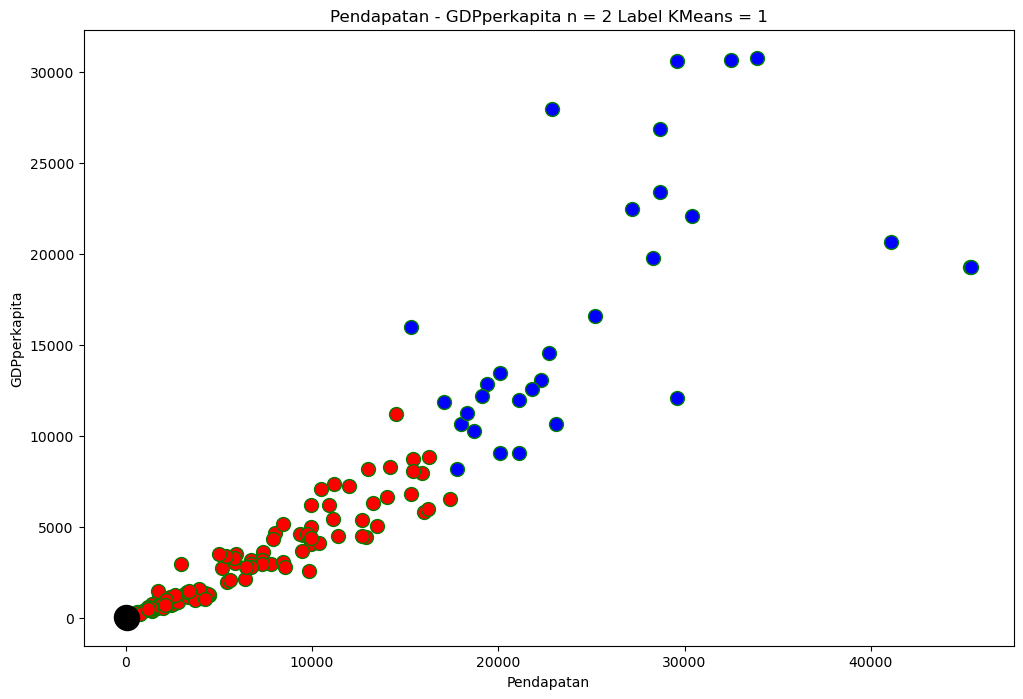

In [214]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Pendapatan'][df4.label1_kmeans == 0], df4['GDPperkapita'][df4.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df4['Pendapatan'][df4.label1_kmeans == 1], df4['GDPperkapita'][df4.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Pendapatan - GDPperkapita n = 2 Label KMeans = 1')
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.show()

<h3>KMeans2 </h3>

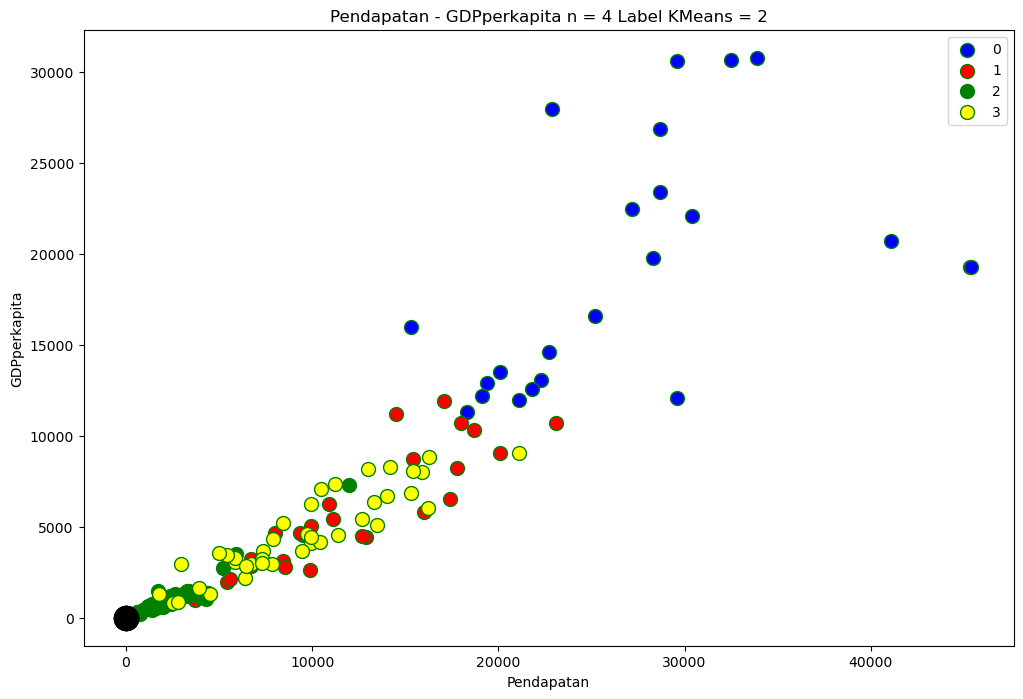

In [215]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Pendapatan'][df4.label2_kmeans==0], df4['GDPperkapita'][df4.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(df4['Pendapatan'][df4.label2_kmeans==1], df4['GDPperkapita'][df4.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(df4['Pendapatan'][df4.label2_kmeans==2], df4['GDPperkapita'][df4.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(df4['Pendapatan'][df4.label2_kmeans==3], df4['GDPperkapita'][df4.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Pendapatan - GDPperkapita n = 4 Label KMeans = 2')
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.legend()
plt.show()

<h3>Kematian_anak - Jumlah fertiliti</h3>

In [216]:
# Kematian_anak - Jumlah_fertiliti
top_Kematian_anak = df4[df4['label2_kmeans']==0]
top_Kematian_anak.sort_values(by=['Kematian_anak'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
89,Libya,16.6,65.6,3.88,42.1,29600.0,14.200,76.1,2.41,12100.0,0.0,0.0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400.0,17.200,75.1,2.96,19300.0,0.0,0.0
171,NaN,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,0.0,0.0
169,NaN,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0.0,0.0
115,Oman,11.7,65.7,2.77,41.2,45300.0,15.600,76.1,2.90,19300.0,0.0,0.0
168,NaN,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,0.0,0.0
33,Chile,8.7,37.7,7.96,31.3,19400.0,8.960,79.1,1.88,12900.0,0.0,0.0
170,NaN,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,0.0,0.0
200,NaN,7.8,53.7,6.68,55.1,18300.0,-0.812,73.1,1.36,11300.0,0.0,0.0
219,NaN,7.0,76.3,8.79,77.8,25200.0,0.485,75.5,1.43,16600.0,0.0,0.0


In [217]:
df[(df['Kematian_anak'] == 64.4)]


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988


In [218]:
# Harapan_anak terkecil
top_Kematian_anak = df4[df4['label2_kmeans']==0]
top_Kematian_anak.sort_values(by=['Jumlah_fertiliti'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
197,NaN,4.6,35.0,7.63,32.9,29600.0,1.770,81.4,3.03,30600.0,0.0,0.0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400.0,17.200,75.1,2.96,19300.0,0.0,0.0
115,Oman,11.7,65.7,2.77,41.2,45300.0,15.600,76.1,2.90,19300.0,0.0,0.0
89,Libya,16.6,65.6,3.88,42.1,29600.0,14.200,76.1,2.41,12100.0,0.0,0.0
170,NaN,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,0.0,0.0
168,NaN,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,0.0,0.0
33,Chile,8.7,37.7,7.96,31.3,19400.0,8.960,79.1,1.88,12900.0,0.0,0.0
169,NaN,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0.0,0.0
171,NaN,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,0.0,0.0
188,NaN,4.5,75.1,6.03,68.7,22700.0,1.740,76.0,1.72,14600.0,0.0,0.0


<h3>KMeans 1</h3>

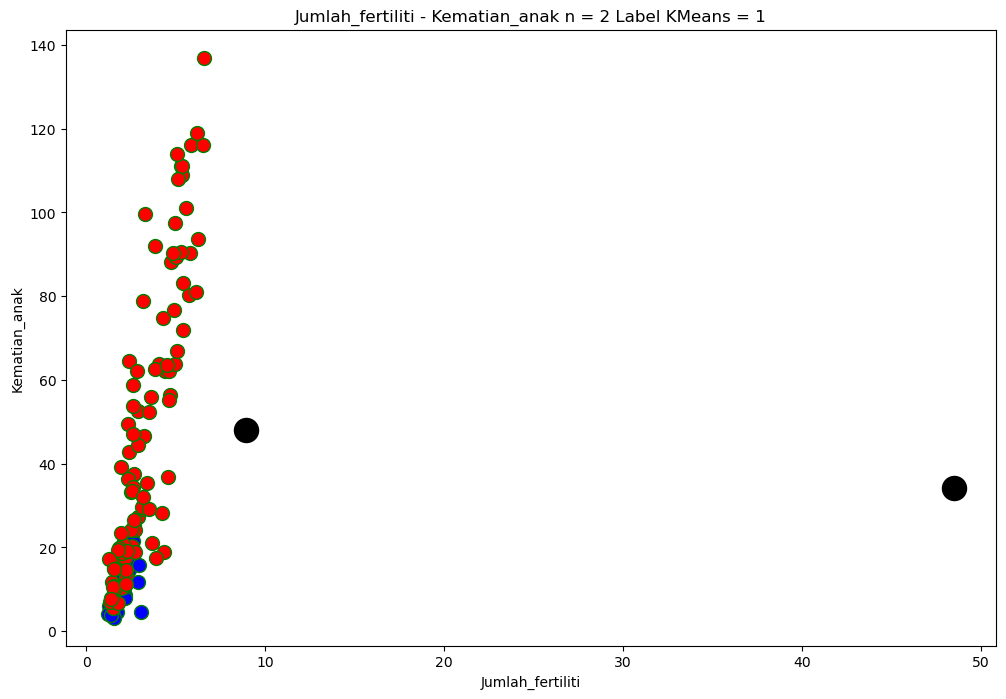

In [219]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Jumlah_fertiliti'][df4.label1_kmeans == 0], df4['Kematian_anak'][df4.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label1_kmeans == 1], df4['Kematian_anak'][df4.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Jumlah_fertiliti - Kematian_anak n = 2 Label KMeans = 1')
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Kematian_anak')
plt.show()

<h3>KMeans 2</h3>

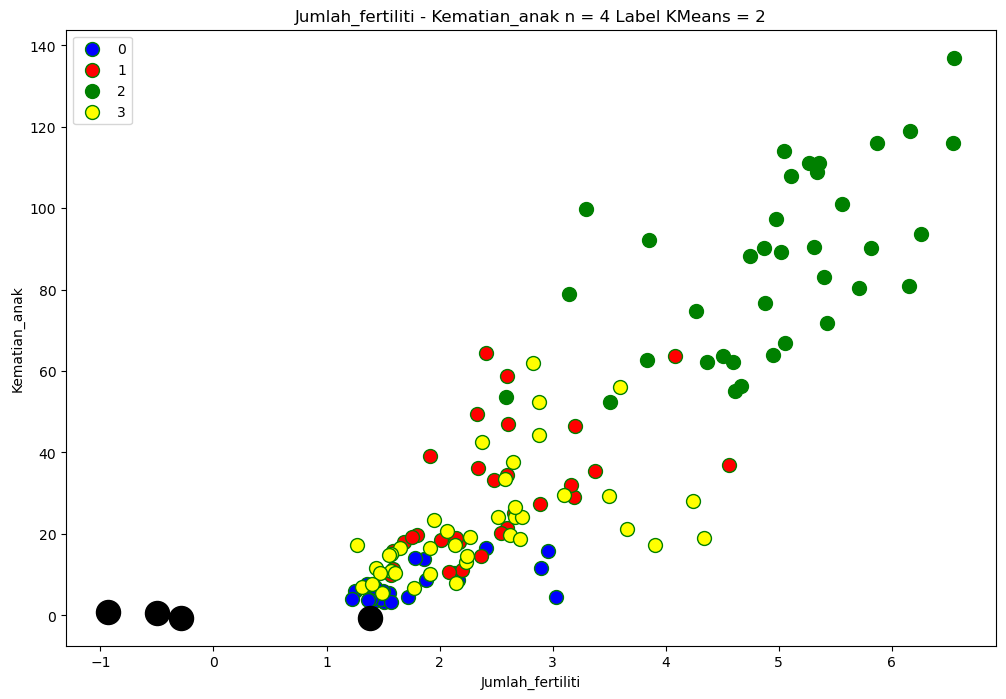

In [220]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==0], df4['Kematian_anak'][df4.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==1], df4['Kematian_anak'][df4.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==2], df4['Kematian_anak'][df4.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==3], df4['Kematian_anak'][df4.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Jumlah_fertiliti - Kematian_anak n = 4 Label KMeans = 2')
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Kematian_anak')
plt.legend()
plt.show()

<h3>Ekspor-Impor</h3>

In [221]:
top_Impor = df4[df4['label2_kmeans']==0]
top_Impor

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
33,Chile,8.7,37.7,7.96,31.3,19400.0,8.960,79.1,1.88,12900.0,0.0,0.0
89,Libya,16.6,65.6,3.88,42.1,29600.0,14.200,76.1,2.41,12100.0,0.0,0.0
115,Oman,11.7,65.7,2.77,41.2,45300.0,15.600,76.1,2.90,19300.0,0.0,0.0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400.0,17.200,75.1,2.96,19300.0,0.0,0.0
168,NaN,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,0.0,0.0
169,NaN,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0.0,0.0
170,NaN,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,0.0,0.0
171,NaN,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,0.0,0.0
182,NaN,5.5,37.6,7.76,38.1,20100.0,0.821,76.3,1.55,13500.0,0.0,0.0
183,NaN,3.6,50.2,5.97,57.5,33900.0,2.010,79.9,1.42,30800.0,0.0,0.0


In [223]:
# Top Impor
top_Impor.sort_values(by=['Impor'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
89,Libya,16.6,65.6,3.88,42.1,29600.0,14.20,76.1,2.41,12100.0,0.0,0.0
115,Oman,11.7,65.7,2.77,41.2,45300.0,15.60,76.1,2.90,19300.0,0.0,0.0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400.0,17.20,75.1,2.96,19300.0,0.0,0.0
33,Chile,8.7,37.7,7.96,31.3,19400.0,8.96,79.1,1.88,12900.0,0.0,0.0


In [224]:
# Top Ekspor
top_Impor.sort_values(by=['Ekspor'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
115,Oman,11.7,65.7,2.77,41.2,45300.0,15.60,76.1,2.90,19300.0,0.0,0.0
89,Libya,16.6,65.6,3.88,42.1,29600.0,14.20,76.1,2.41,12100.0,0.0,0.0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400.0,17.20,75.1,2.96,19300.0,0.0,0.0
33,Chile,8.7,37.7,7.96,31.3,19400.0,8.96,79.1,1.88,12900.0,0.0,0.0


<h3>KMeans 1</h3>

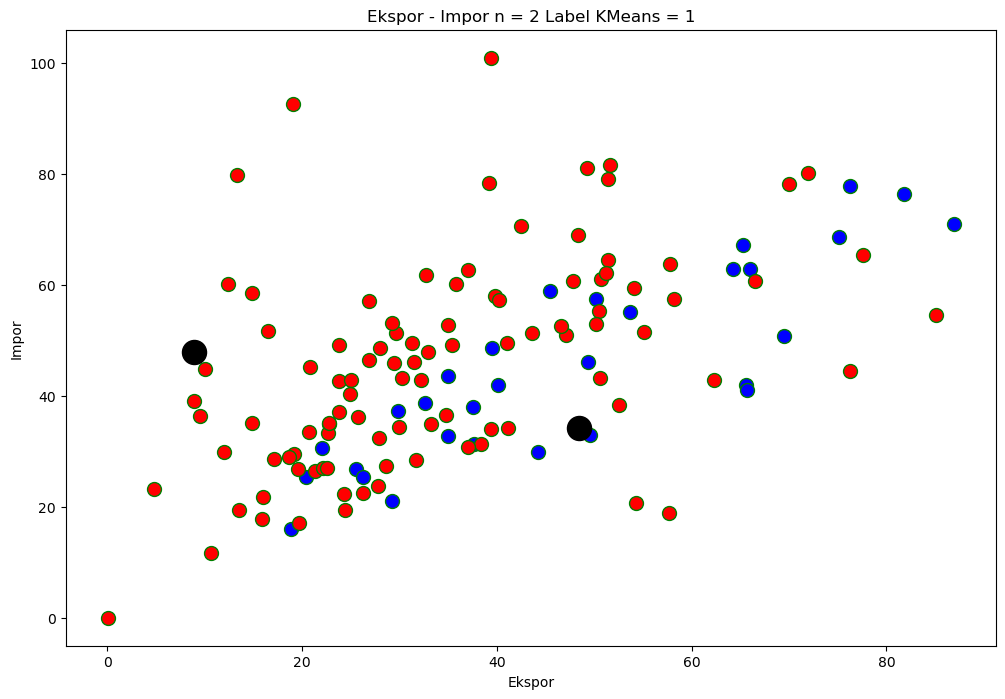

In [225]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Ekspor'][df4.label1_kmeans == 0], df4['Impor'][df4.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df4['Ekspor'][df4.label1_kmeans == 1], df4['Impor'][df4.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Ekspor - Impor n = 2 Label KMeans = 1')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
plt.show()

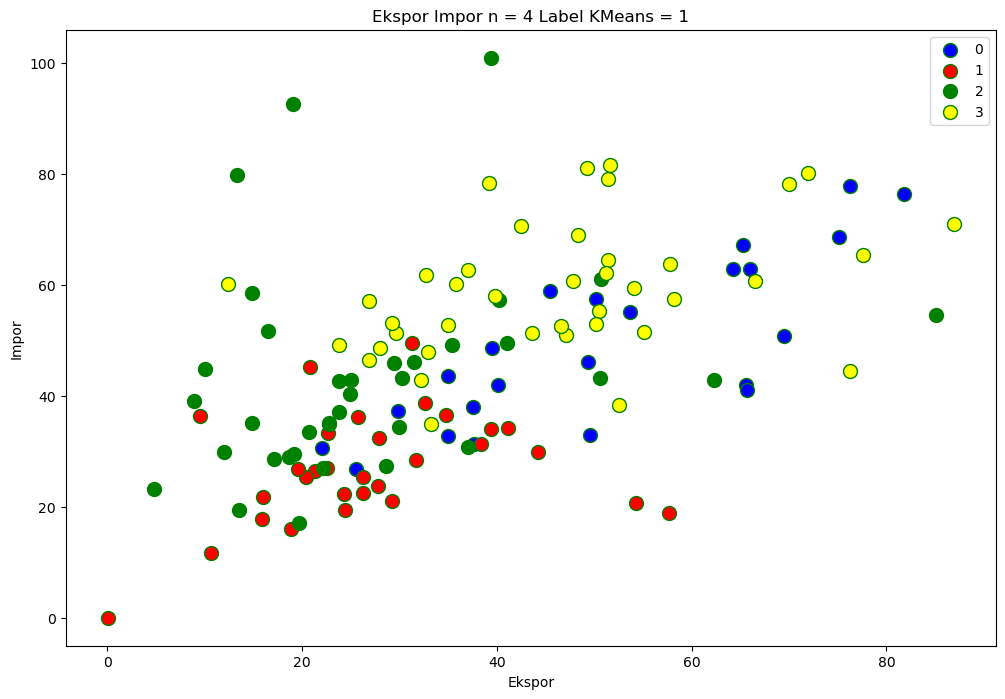

In [226]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Ekspor'][df4.label2_kmeans == 0], df4['Impor'][df4.label2_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(df4['Ekspor'][df4.label2_kmeans == 1], df4['Impor'][df4.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(df4['Ekspor'][df4.label2_kmeans == 2], df4['Impor'][df4.label2_kmeans == 2], c='green',label = '2', s=100, edgecolor='green')
plt.scatter(df4['Ekspor'][df4.label2_kmeans == 3], df4['Impor'][df4.label2_kmeans == 3], c='yellow', label = '3', s=100, edgecolor='green')

#plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.title('Ekspor Impor n = 4 Label KMeans = 1')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
plt.show()

<h3>KMeans 2</h3>

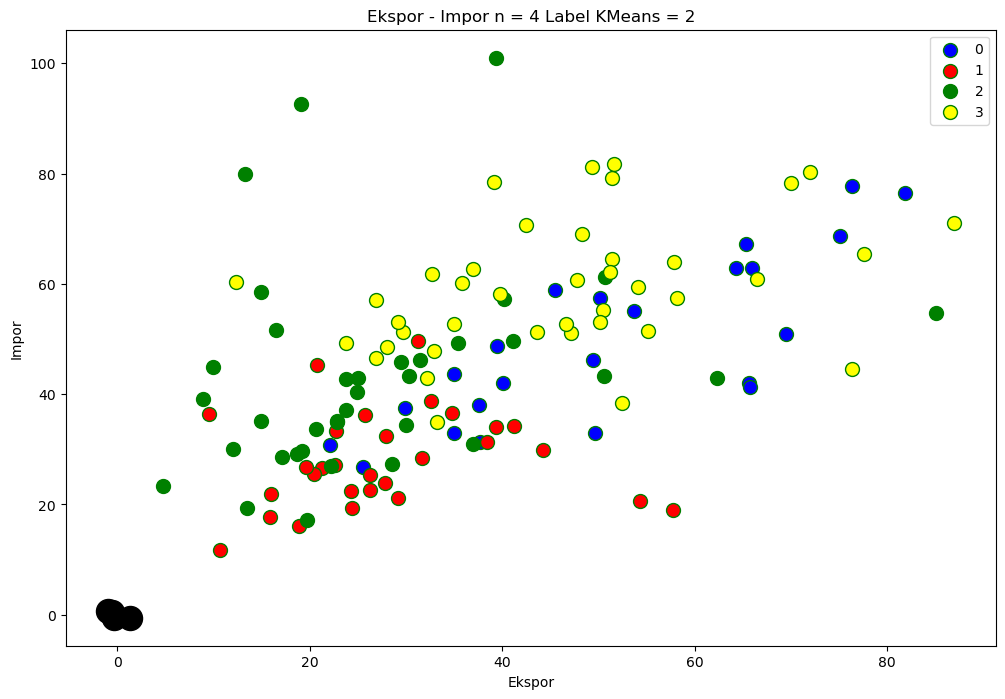

In [227]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Ekspor'][df4.label2_kmeans==0], df4['Impor'][df4.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(df4['Ekspor'][df4.label2_kmeans==1], df4['Impor'][df4.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(df4['Ekspor'][df4.label2_kmeans==2], df4['Impor'][df4.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(df4['Ekspor'][df4.label2_kmeans==3], df4['Impor'][df4.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Ekspor - Impor n = 4 Label KMeans = 2')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
plt.legend()
plt.show()

<h3>Harapan_hidup - Kematian_anak</h3>

In [228]:
top_Harapan_hidup = df4[df4['label2_kmeans']==0]
top_Harapan_hidup

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
33,Chile,8.7,37.7,7.96,31.3,19400.0,8.960,79.1,1.88,12900.0,0.0,0.0
89,Libya,16.6,65.6,3.88,42.1,29600.0,14.200,76.1,2.41,12100.0,0.0,0.0
115,Oman,11.7,65.7,2.77,41.2,45300.0,15.600,76.1,2.90,19300.0,0.0,0.0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400.0,17.200,75.1,2.96,19300.0,0.0,0.0
168,NaN,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,0.0,0.0
169,NaN,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0.0,0.0
170,NaN,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,0.0,0.0
171,NaN,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,0.0,0.0
182,NaN,5.5,37.6,7.76,38.1,20100.0,0.821,76.3,1.55,13500.0,0.0,0.0
183,NaN,3.6,50.2,5.97,57.5,33900.0,2.010,79.9,1.42,30800.0,0.0,0.0


In [229]:
# Top Harapan Hidup
top_Harapan_hidup.sort_values(by=['Harapan_hidup'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
200,NaN,7.8,53.7,6.68,55.1,18300.0,-0.812,73.1,1.36,11300.0,0.0,0.0
202,NaN,6.1,65.3,7.04,67.2,21100.0,2.380,73.2,1.50,12000.0,0.0,0.0
169,NaN,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0.0,0.0
193,NaN,6.0,81.8,7.33,76.5,22300.0,2.330,74.5,1.25,13100.0,0.0,0.0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400.0,17.200,75.1,2.96,19300.0,0.0,0.0
219,NaN,7.0,76.3,8.79,77.8,25200.0,0.485,75.5,1.43,16600.0,0.0,0.0
188,NaN,4.5,75.1,6.03,68.7,22700.0,1.740,76.0,1.72,14600.0,0.0,0.0
170,NaN,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,0.0,0.0
89,Libya,16.6,65.6,3.88,42.1,29600.0,14.200,76.1,2.41,12100.0,0.0,0.0
115,Oman,11.7,65.7,2.77,41.2,45300.0,15.600,76.1,2.90,19300.0,0.0,0.0


In [230]:
df[(df['Harapan_hidup'] == 66.2)]


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.60,1350
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650


In [231]:
# Top Kematian
top_Harapan_hidup.sort_values(by=['Kematian_anak'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
89,Libya,16.6,65.6,3.88,42.1,29600.0,14.200,76.1,2.41,12100.0,0.0,0.0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400.0,17.200,75.1,2.96,19300.0,0.0,0.0
171,NaN,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,0.0,0.0
169,NaN,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0.0,0.0
115,Oman,11.7,65.7,2.77,41.2,45300.0,15.600,76.1,2.90,19300.0,0.0,0.0
168,NaN,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,0.0,0.0
33,Chile,8.7,37.7,7.96,31.3,19400.0,8.960,79.1,1.88,12900.0,0.0,0.0
170,NaN,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,0.0,0.0
200,NaN,7.8,53.7,6.68,55.1,18300.0,-0.812,73.1,1.36,11300.0,0.0,0.0
219,NaN,7.0,76.3,8.79,77.8,25200.0,0.485,75.5,1.43,16600.0,0.0,0.0


<h3>KMeans 1</h3>

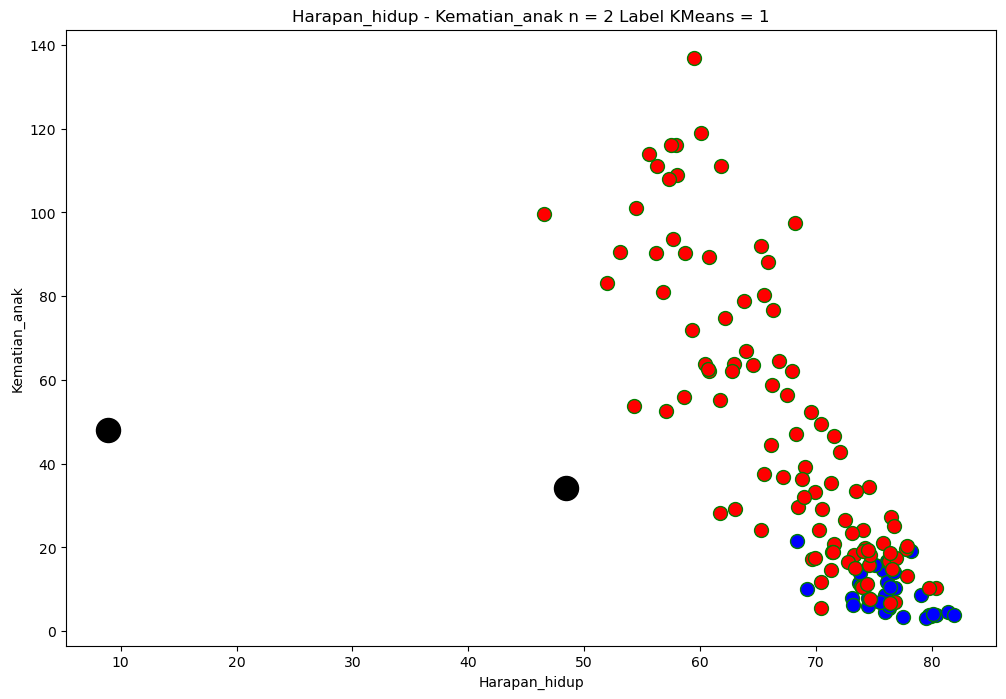

In [232]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Harapan_hidup'][df4.label1_kmeans == 0], df4['Kematian_anak'][df4.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df4['Harapan_hidup'][df4.label1_kmeans == 1], df4['Kematian_anak'][df4.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Harapan_hidup - Kematian_anak n = 2 Label KMeans = 1')
plt.xlabel('Harapan_hidup')
plt.ylabel('Kematian_anak')
plt.show()

<h3>KMeans 2</h3>

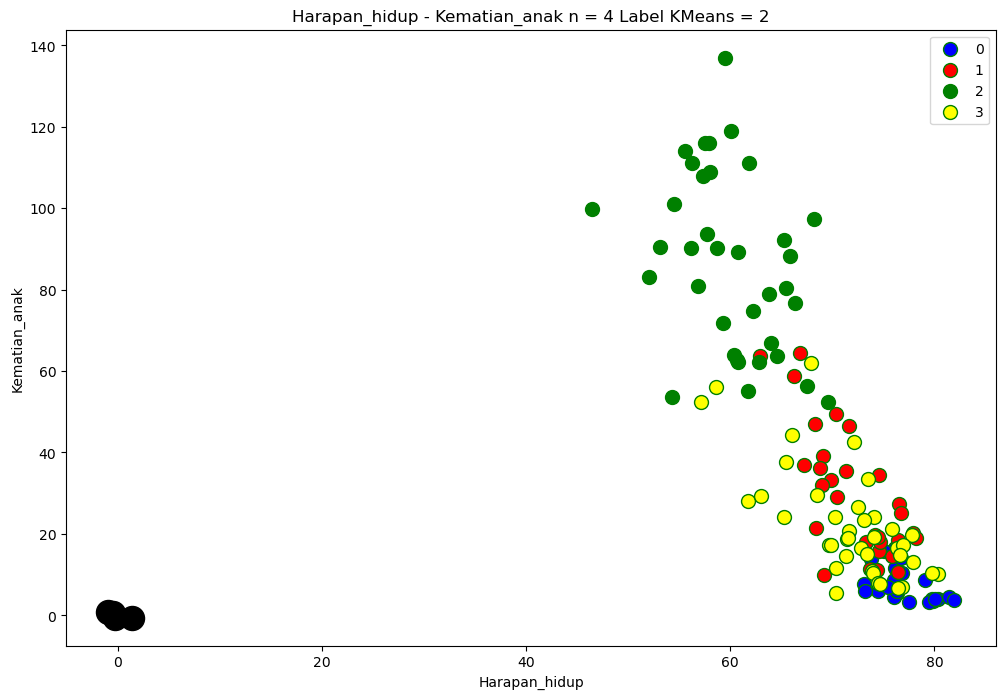

In [233]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Harapan_hidup'][df4.label2_kmeans==0], df4['Kematian_anak'][df4.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(df4['Harapan_hidup'][df4.label2_kmeans==1], df4['Kematian_anak'][df4.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(df4['Harapan_hidup'][df4.label2_kmeans==2], df4['Kematian_anak'][df4.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(df4['Harapan_hidup'][df4.label2_kmeans==3], df4['Kematian_anak'][df4.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Harapan_hidup - Kematian_anak n = 4 Label KMeans = 2')
plt.xlabel('Harapan_hidup')
plt.ylabel('Kematian_anak')
plt.legend()
plt.show()

<h3>Jumlah Fertiliti - Harapan Hidup</h3>

In [234]:
top_Jumlah_fertiliti = df4[df4['label2_kmeans']==0]
top_Jumlah_fertiliti

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
33,Chile,8.7,37.7,7.96,31.3,19400.0,8.960,79.1,1.88,12900.0,0.0,0.0
89,Libya,16.6,65.6,3.88,42.1,29600.0,14.200,76.1,2.41,12100.0,0.0,0.0
115,Oman,11.7,65.7,2.77,41.2,45300.0,15.600,76.1,2.90,19300.0,0.0,0.0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400.0,17.200,75.1,2.96,19300.0,0.0,0.0
168,NaN,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,0.0,0.0
169,NaN,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0.0,0.0
170,NaN,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,0.0,0.0
171,NaN,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,0.0,0.0
182,NaN,5.5,37.6,7.76,38.1,20100.0,0.821,76.3,1.55,13500.0,0.0,0.0
183,NaN,3.6,50.2,5.97,57.5,33900.0,2.010,79.9,1.42,30800.0,0.0,0.0


In [235]:
# Top Harapan_hidup
top_Jumlah_fertiliti.sort_values(by=['Harapan_hidup'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
200,NaN,7.8,53.7,6.68,55.1,18300.0,-0.812,73.1,1.36,11300.0,0.0,0.0
202,NaN,6.1,65.3,7.04,67.2,21100.0,2.380,73.2,1.50,12000.0,0.0,0.0
169,NaN,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0.0,0.0
193,NaN,6.0,81.8,7.33,76.5,22300.0,2.330,74.5,1.25,13100.0,0.0,0.0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400.0,17.200,75.1,2.96,19300.0,0.0,0.0
219,NaN,7.0,76.3,8.79,77.8,25200.0,0.485,75.5,1.43,16600.0,0.0,0.0
188,NaN,4.5,75.1,6.03,68.7,22700.0,1.740,76.0,1.72,14600.0,0.0,0.0
170,NaN,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,0.0,0.0
89,Libya,16.6,65.6,3.88,42.1,29600.0,14.200,76.1,2.41,12100.0,0.0,0.0
115,Oman,11.7,65.7,2.77,41.2,45300.0,15.600,76.1,2.90,19300.0,0.0,0.0


In [236]:
# Top Fertiliti
top_Jumlah_fertiliti.sort_values(by=['Jumlah_fertiliti'],ascending=False)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
197,NaN,4.6,35.0,7.63,32.9,29600.0,1.770,81.4,3.03,30600.0,0.0,0.0
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400.0,17.200,75.1,2.96,19300.0,0.0,0.0
115,Oman,11.7,65.7,2.77,41.2,45300.0,15.600,76.1,2.90,19300.0,0.0,0.0
89,Libya,16.6,65.6,3.88,42.1,29600.0,14.200,76.1,2.41,12100.0,0.0,0.0
170,NaN,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,0.0,0.0
168,NaN,10.3,45.5,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,0.0,0.0
33,Chile,8.7,37.7,7.96,31.3,19400.0,8.960,79.1,1.88,12900.0,0.0,0.0
169,NaN,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0.0,0.0
171,NaN,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,0.0,0.0
188,NaN,4.5,75.1,6.03,68.7,22700.0,1.740,76.0,1.72,14600.0,0.0,0.0


<h3>KMeans 1</h3>

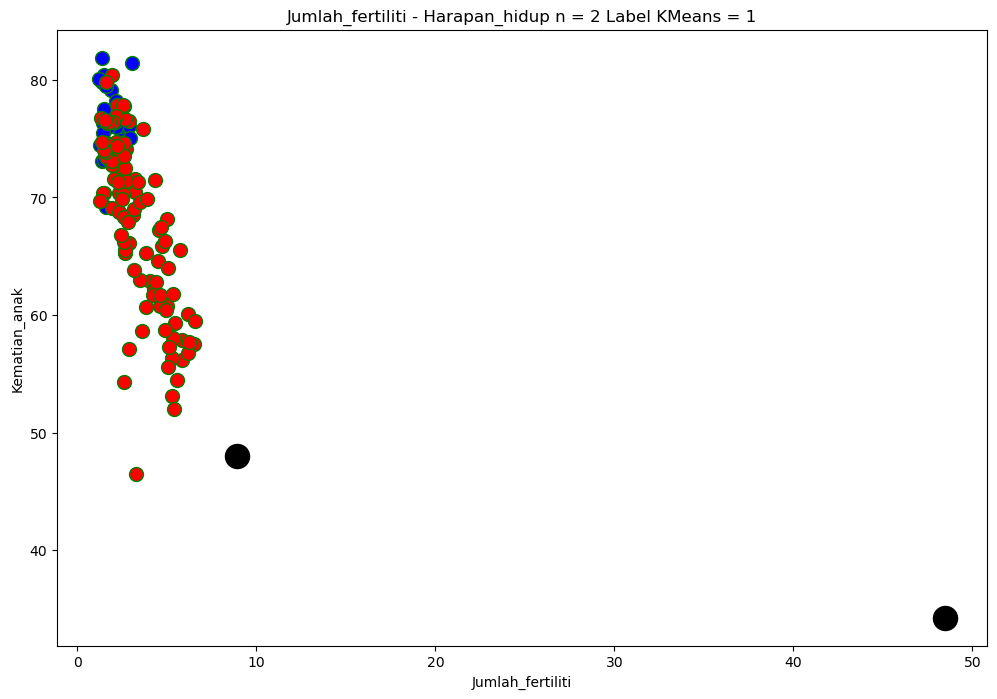

In [237]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Jumlah_fertiliti'][df4.label1_kmeans == 0], df4['Harapan_hidup'][df4.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label1_kmeans == 1], df4['Harapan_hidup'][df4.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.title('Jumlah_fertiliti - Harapan_hidup n = 2 Label KMeans = 1')
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Kematian_anak')
plt.show()

<h3>Kmeans 2</h3>

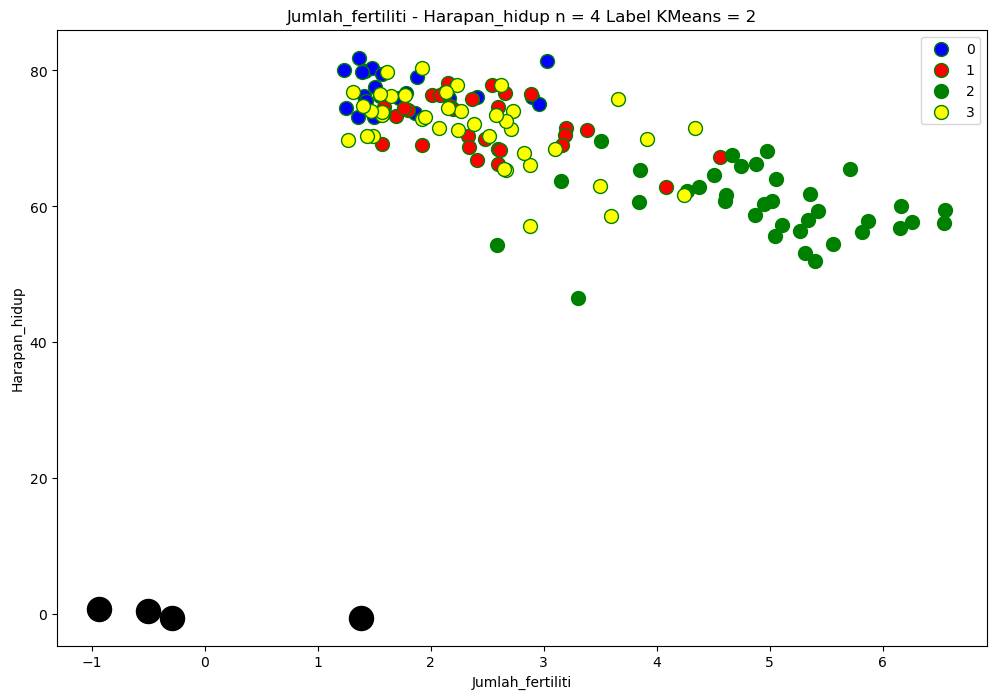

In [238]:
plt.figure(figsize=(12,8))

plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==0], df4['Harapan_hidup'][df4.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==1], df4['Harapan_hidup'][df4.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==2], df4['Harapan_hidup'][df4.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(df4['Jumlah_fertiliti'][df4.label2_kmeans==3], df4['Harapan_hidup'][df4.label2_kmeans==3], label ='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Jumlah_fertiliti - Harapan_hidup n = 4 Label KMeans = 2')
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Harapan_hidup')
plt.legend()
plt.show()

<h3>3D Visualization</h3>

In [239]:
df5 = remove_outlier(df[['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']])
df5.dropna(axis=0, inplace=True)

In [240]:
from sklearn.preprocessing import StandardScaler

sc5 = StandardScaler()
df_std5 = sc5.fit_transform(df5.astype(float))

In [241]:
kmeans5 = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std5)
labels5 = kmeans5.labels_

c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ichvan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [242]:
new_df5 = pd.DataFrame(data=df_std5, columns=['Kematian_anak', 'Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita'])
new_df5['label5_kmeans'] = labels5
new_df5

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label5_kmeans
0,1.492609,-1.471494,0.536055,-0.036074,-0.973550,0.348142,-1.745686,1.922744,-0.821294,2
1,-0.664447,-0.506321,0.075227,0.166098,-0.118393,-0.462824,0.889613,-0.943787,-0.323232,3
2,-0.350853,0.051335,-0.989600,-0.773730,0.186874,1.439258,0.915835,-0.091389,-0.271131,1
3,2.336675,1.332871,-1.580176,-0.145357,-0.532610,2.471396,-1.234360,2.156465,-0.402089,2
4,-0.849086,0.432042,-0.157425,0.728903,0.824131,-0.962509,0.955168,-0.613826,0.818776,0
...,...,...,...,...,...,...,...,...,...,...
124,-0.087083,-0.307924,-0.255854,-0.932190,-0.703230,1.504791,-0.093708,-0.469469,-0.704841,1
125,-0.295168,0.491025,-0.506401,0.390127,-0.835821,-0.769188,-0.854142,0.327935,-0.480945,3
126,-0.468085,1.852992,0.204974,1.892760,-0.677534,0.783933,0.470063,-0.737561,-0.714698,3
127,0.499074,-0.399079,-0.537720,-0.609807,-0.678562,2.667993,-0.264150,1.132214,-0.714698,2


<h3>Plot 3D - Kematian_anak, Jumlah_Fertiliti, dan harapan Hidup</h3>

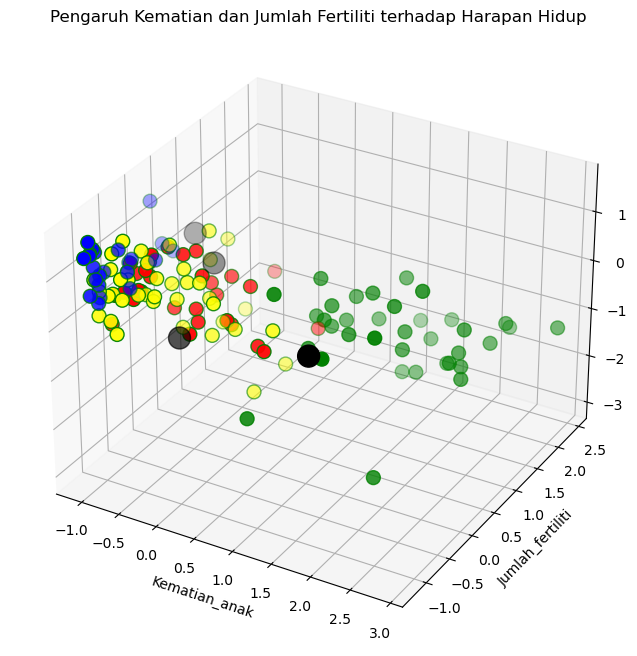

In [243]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==0], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==0], new_df5['Harapan_hidup'][new_df5.label5_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==1], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==1], new_df5['Harapan_hidup'][new_df5.label5_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==2], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==2], new_df5['Harapan_hidup'][new_df5.label5_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==3], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==3], new_df5['Harapan_hidup'][new_df5.label5_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
scatter = ax.scatter(kmeans5.cluster_centers_[:, 0],
            kmeans5.cluster_centers_[:, 1],
            kmeans5.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='k',
            label='centroids')
plt.title('Pengaruh Kematian dan Jumlah Fertiliti terhadap Harapan Hidup')
plt.xlabel('Kematian_anak')
plt.ylabel('Jumlah_fertiliti')
ax.set_zlabel('Harapan_hidup')
plt.show()

<h3>Plot 3D - Kematian_anak, Jumlah Fertiliti, dan Inflasi</h3>

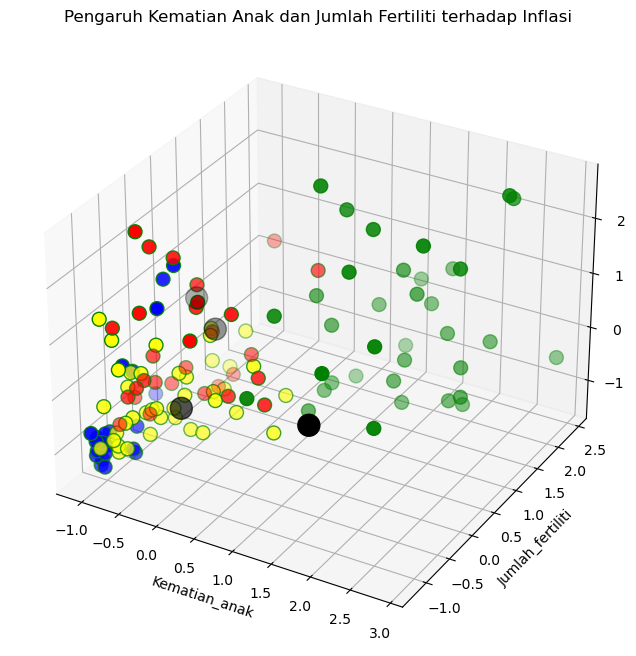

In [244]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==0], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==0], new_df5['Inflasi'][new_df5.label5_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==1], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==1], new_df5['Inflasi'][new_df5.label5_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==2], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==2], new_df5['Inflasi'][new_df5.label5_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df5['Kematian_anak'][new_df5.label5_kmeans==3], new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==3], new_df5['Inflasi'][new_df5.label5_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
scatter = ax.scatter(kmeans5.cluster_centers_[:, 0],
            kmeans5.cluster_centers_[:, 1],
            kmeans5.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='k',
            label='centroids')
plt.title('Pengaruh Kematian Anak dan Jumlah Fertiliti terhadap Inflasi')
plt.xlabel('Kematian_anak')
plt.ylabel('Jumlah_fertiliti')
ax.set_zlabel('Inflasi')
plt.show()

<h3>Plot 3D - GDPperkapita, Pendapatan, dan Ekspor </h3>

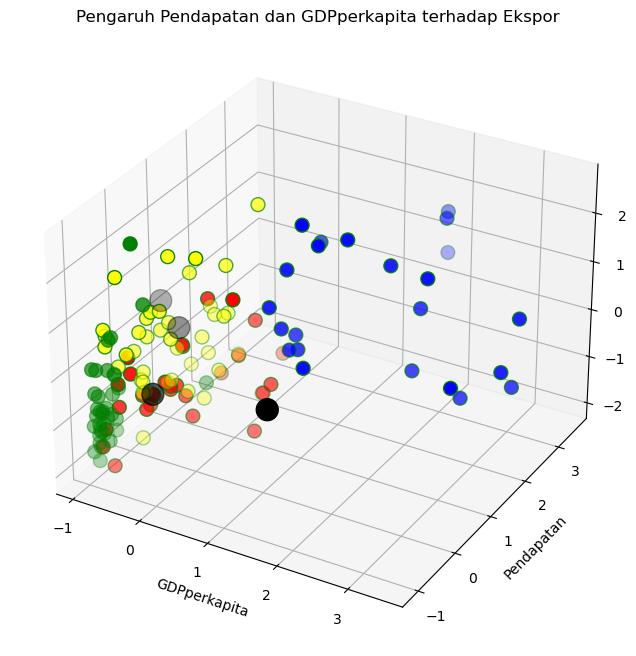

In [245]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==0], new_df5['Pendapatan'][new_df5.label5_kmeans==0], new_df5['Ekspor'][new_df5.label5_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==1], new_df5['Pendapatan'][new_df5.label5_kmeans==1], new_df5['Ekspor'][new_df5.label5_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==2], new_df5['Pendapatan'][new_df5.label5_kmeans==2], new_df5['Ekspor'][new_df5.label5_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==3], new_df5['Pendapatan'][new_df5.label5_kmeans==3], new_df5['Ekspor'][new_df5.label5_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
scatter = ax.scatter(kmeans5.cluster_centers_[:, 0],
            kmeans5.cluster_centers_[:, 1],
            kmeans5.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='k',
            label='centroids')
plt.title('Pengaruh Pendapatan dan GDPperkapita terhadap Ekspor')
plt.xlabel('GDPperkapita')
plt.ylabel('Pendapatan')
ax.set_zlabel('Ekspor')
plt.show()

<h3>Plot 3D - GDPperkapita, Pendapatan, dan Kesehatan</h3>

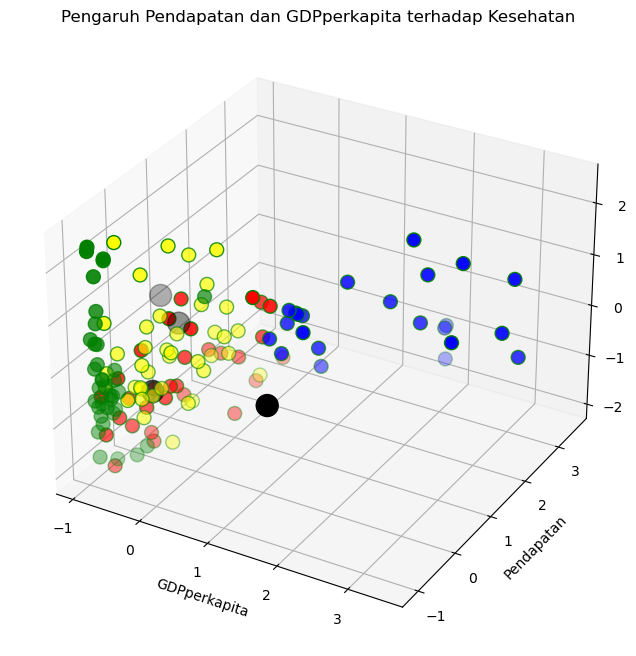

In [246]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==0], new_df5['Pendapatan'][new_df5.label5_kmeans==0], new_df5['Kesehatan'][new_df5.label5_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==1], new_df5['Pendapatan'][new_df5.label5_kmeans==1], new_df5['Kesehatan'][new_df5.label5_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==2], new_df5['Pendapatan'][new_df5.label5_kmeans==2], new_df5['Kesehatan'][new_df5.label5_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df5['GDPperkapita'][new_df5.label5_kmeans==3], new_df5['Pendapatan'][new_df5.label5_kmeans==3], new_df5['Kesehatan'][new_df5.label5_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
scatter = ax.scatter(kmeans5.cluster_centers_[:, 0],
            kmeans5.cluster_centers_[:, 1],
            kmeans5.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='k',
            label='centroids')
plt.title('Pengaruh Pendapatan dan GDPperkapita terhadap Kesehatan')
plt.xlabel('GDPperkapita')
plt.ylabel('Pendapatan')
ax.set_zlabel('Kesehatan')
plt.show()

<h3>Plot 3D - Jumlah Fertiliti, Kesehatan, dan Pendapatan</h3>

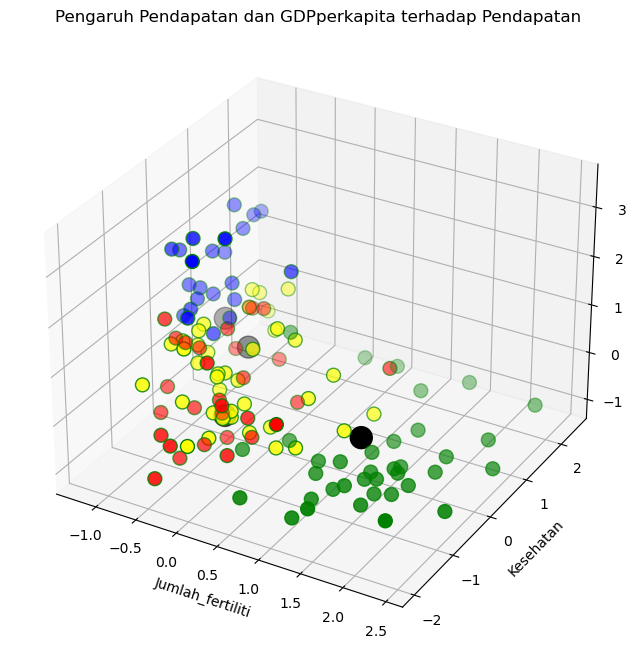

In [247]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==0], new_df5['Kesehatan'][new_df5.label5_kmeans==0], new_df5['Pendapatan'][new_df5.label5_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==1], new_df5['Kesehatan'][new_df5.label5_kmeans==1], new_df5['Pendapatan'][new_df5.label5_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==2], new_df5['Kesehatan'][new_df5.label5_kmeans==2], new_df5['Pendapatan'][new_df5.label5_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df5['Jumlah_fertiliti'][new_df5.label5_kmeans==3], new_df5['Kesehatan'][new_df5.label5_kmeans==3], new_df5['Pendapatan'][new_df5.label5_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
scatter = ax.scatter(kmeans5.cluster_centers_[:, 0],
            kmeans5.cluster_centers_[:, 1],
            kmeans5.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='k',
            label='centroids')
plt.title('Pengaruh Pendapatan dan GDPperkapita terhadap Pendapatan')
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Kesehatan')
ax.set_zlabel('Pendapatan')
plt.show()